<a href="https://colab.research.google.com/github/AndrewXIE1/crypto-ABX/blob/main/Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python数据科学笔记
**Andrew Xie**

In [ ]:
import pandas as pd

#  (For rows, you would use axis=0).
# axis=1表示先column
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [5, None, None, 8],
    'C': [10, 11, 12, None],
    'D': [None, None, None, None],
    'E': [2, 5, 6, 7]
})
df

,A,B,C,D,E
0,1.0,5.0,10.0,None,2
1,2.0,NaN,11.0,None,5
2,NaN,NaN,12.0,None,6
3,4.0,8.0,NaN,None,7


In [ ]:
df=df.rename(columns={'A':'a', 'B':'b'},inplace=False)
df

,a,b,C,D,E
0,1.0,5.0,10.0,None,2
1,2.0,NaN,11.0,None,5
2,NaN,NaN,12.0,None,6
3,4.0,8.0,NaN,None,7


In [ ]:
#列与行
#举个例子，如果你有一个包含多行和列的DataFrame，并且你想计算每一列的总和，你会使用 df.sum(axis=0)。相反，如果你想计算每一行的总和，你会使用 df.sum(axis=1)。

In [ ]:
df.dtypes

A    float64
B    float64
C    float64
D     object
E      int64
dtype: object

## 缺失值的处理

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
data = {
    'num1': [1.0, 2.5, np.nan, 4.2, 5.1],
    'num2': [10, 20, np.nan, 40, 50],
    'text': ['apple', 'banana', np.nan, 'cherry', 'date'],
    'boolean': [True, False, True, np.nan, False]
}
df = pd.DataFrame(data)

# 检查数值型列的缺失值
num_missing = df.select_dtypes(include=[np.number]).isna()

# 显示数值型列的缺失值情况
num_missing

,num1,num2
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False


### 缺失值Overview

In [ ]:
df.isna().sum()

num1       1
num2       1
text       1
boolean    1
dtype: int64



> ### 缺失值剔除



#### 列维度

In [ ]:
##缺失值的列剔除
##使用axis=1 和 how='all' 的组合。这意味着它只会删除那些所有值都是缺失值（NaN）的列
df_drop=df.dropna(axis=1, how='all')
df_drop
##使用axis=1 和 how='any' 的组合。这意味着它会删除那些存在任意一个值是缺失值（NaN）的列
df_drop_any=df.dropna(axis=1, how='any')
df_drop_any

""
0
1
2
3
4


#### 行维度

In [ ]:
##缺失值的行剔除
##使用axis=1 和 how='all' 的组合。这意味着它只会删除那些所有值都是缺失值（NaN）的列
df_drop=df.dropna(axis=0, how='all')
df_drop
##使用axis=0 和 how='any' 的组合。这意味着它会删除那些存在任意一个值是缺失值（NaN）的行
df_drop_any=df.dropna(axis=0, how='any')
df_drop_any

,num1,num2,text,boolean
0,1.0,10.0,apple,True
1,2.5,20.0,banana,False
4,5.1,50.0,date,False


### 缺失值填充为0


In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
data = {
    'num1': [1.0, 2.5, np.nan, 4.2, 5.1],
    'num2': [10, 20, np.nan, 40, 50],
    'text': ['apple', 'banana', np.nan, 'cherry', 'date'],
    'boolean': [True, False, True, np.nan, False]
}
df = pd.DataFrame(data)

##将缺失值填充为0
df_filled = df.fillna(0)
df_filled

,num1,num2,text,boolean
0,1.0,10.0,apple,True
1,2.5,20.0,banana,False
2,0.0,0.0,0,True
3,4.2,40.0,cherry,0
4,5.1,50.0,date,False


### 根据特定变量，剔除缺失值



In [ ]:
###去除特定变量为缺失值的行
import pandas as pd
import numpy as np

# 模拟数据集
data = {
    'industry_sw_2021': [np.nan, 'Finance', 'Technology', np.nan, 'Healthcare', 'High-tech'],
    'other_column': [1, 2, 3, 4, 5, np.nan]
}
dupont_2019 = pd.DataFrame(data)

# 过滤操作
dupont_2019_cleaned = dupont_2019.dropna(subset=['industry_sw_2021','other_column'])
dupont_2019_cleaned

,industry_sw_2021,other_column
1,Finance,2.0
2,Technology,3.0
4,Healthcare,5.0


In [ ]:
# 模拟数据集
data = {
    'num1': [1, -1, 3, np.nan, 5],
    'num2': [6, 7, 8, -9, 10],
    'char1': ['abc', ' ', 'def', 'ghi', ''],
    'char2': ['jkl', 'mno', 'pqr', ' ', 'stu']
}
df = pd.DataFrame(data)
df

,num1,num2,char1,char2
0,1.0,6,abc,jkl
1,-1.0,7,,mno
2,3.0,8,def,pqr
3,NaN,-9,ghi,
4,5.0,10,,stu


### 根据字符型和数值型，分别剔除

In [ ]:
###python中根据字符和数值进行分别操作

import pandas as pd
import numpy as np

# 模拟数据集
data = {
    'num1': [1, -1, 3, np.nan, 5],
    'num2': [6, 7, 8, -9, 10],
    'char1': ['abc', ' ', 'def', 'ghi', ''],
    'char2': ['jkl', 'mno', 'pqr', ' ', 'stu']
}
df = pd.DataFrame(data)

# 删除包含负数或缺失值的数值型变量的行
df = df[~(df.select_dtypes(include=['number']) < 0).any(axis=1)]

####注：在Pandas中，当您使用 axis=1 时，这确实表示操作是沿着列方向进行的。
###具体来说，在 .any(axis=1) 的上下文中，这意味着对于DataFrame中的每一行，我们会沿着列的方向检查条件，即查看该行中的任何列是否满足条件（例如，是否有任何列的值为True）。
####简而言之，在pandas中，axis=1 用于指定操作是按行进行的，对每一行的所有列进行操作

df = df.dropna()

# 删除包含空白字符串的字符型变量的行
df = df[~df.select_dtypes(include=['object']).applymap(lambda x: x.strip() == '').any(axis=1)]

# 显示结果
df

,num1,num2,char1,char2
0,1.0,6,abc,jkl
2,3.0,8,def,pqr


In [ ]:
# 注：
# 不能写成df = df[(df.select_dtypes(include=['number']) >= 0).any(axis=1)]
## 因为这段代码的作用是：保留那些在所有数值型列中至少有一个值大于或等于0的行。这意味着，即使某行中的一些数值型列的值小于0，只要至少有一个数值型列的值大于或等于0，这行就会被保留

## 原代码df = df[~(df.select_dtypes(include=['number']) < 0).any(axis=1)]
## 这段代码的作用是：保留那些在所有数值型列中没有任何一个值小于0的行。换句话说，只要一行中有任何一个数值型列的值小于0，那么这行就会被排除。

### 变量改名

In [ ]:
#变量rename & drop

df_r=df.rename(columns={'A': 'A_New'}, inplace=False)
df_r

,num1,num2,char1,char2
0,1.0,6,abc,jkl
2,3.0,8,def,pqr


In [ ]:
#####改多个名：
df_r = df.rename(columns={'A': 'A_New', 'B': 'B_New', 'C': 'C_New'}, inplace=False)

### 剔除

#### 剔除行

In [ ]:
#df_d = df.drop(['C'], axis=1)
#df_d

#df.drop(columns=['Industry'],axis=1,inplace=True)

#### 剔除列

In [ ]:
import pandas as pd

# 创建模拟数据集
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

df = pd.DataFrame(data)

# 删除索引为 2 的行
df.drop(index=2, axis=0, inplace=True)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
3,David,40,Houston
4,Eve,45,Phoenix


###### 剔除一个区间的列

In [ ]:
import pandas as pd

# 创建模拟数据集
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

df = pd.DataFrame(data)

# 删除第 3 行到第 5 行（行索引 2 到 5）
df.drop(df.index[2:5], axis=0, inplace=True)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles


#### 注：Python索引的半开区间
Python索引遵循 [x, y) 结构，这称为"半开区间"。在这种结构中，区间包括起始点 x 但不包括结束点 y。

## 替代

In [ ]:
import pandas as pd

dataset = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column_s': [1, 0, 0, 1],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})


dataset['common_column_s']= dataset['common_column_s'].replace(1,True)
dataset['common_column_s']= dataset['common_column_s'].replace(0,False)
dataset

,common_column1,common_column_s,common_column2,other_column1
0,1,True,x,a
1,2,False,y,b
2,3,False,z,c
3,4,True,w,d


## 筛选

### 直接筛选，类似where的筛选1

In [ ]:
###类型where的筛选

import pandas as pd

# 模拟数据集
data = {'value': [5, 11, 15, 8, 20, 9, 13]}
df = pd.DataFrame(data)

# 筛选value大于10的行
example = df[df['value'] > 10]

# 显示结果
example

,value
1,11
2,15
4,20
6,13


### 直接筛选，类似where的筛选2

In [ ]:
dataset = df[df.value > 10]

dataset

,value
1,11
2,15
4,20
6,13


### 类似SQL Query 筛选

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

# 使用 pandas 的 query 方法进行筛选
subquery_df = df1.query('(common_column1 < 3) and (common_column2 == "x" or common_column2 == "y") or (other_column1 == "c")')

# 显示结果
subquery_df

,common_column1,common_column2,other_column1
0,1,x,a
1,2,y,b
2,3,z,c


In [ ]:
data = {'value': [5, 11, 15, 8, 20, 9, 13]}
df = pd.DataFrame(data)

# 子查询情景 - 使用 pandas 的 query 方法进行筛选
subquery_df = df.query('value >= 10')
subquery_df

,value
1,11
2,15
4,20
6,13


## 转置

In [ ]:
import pandas as pd
import numpy as np

# 生成模拟数据集
np.random.seed(0)
data = {
    'Category': ['A', 'B', 'C', 'D', 'E'],
    '2021 Sales': np.random.randint(100, 500, 5),
    '2022 Sales': np.random.randint(100, 500, 5),
    '2021 Profit': np.random.uniform(50, 200, 5),
    '2022 Profit': np.random.uniform(50, 200, 5),
    'Region': ['North', 'South', 'East', 'West', 'Central']
}
df = pd.DataFrame(data)

df

,Category,2021 Sales,2022 Sales,2021 Profit,2022 Profit,Region
0,A,272,351,146.884117,168.758756,North
1,B,147,295,115.638082,129.334238,South
2,C,217,459,183.765950,135.206684,East
3,D,292,109,194.549414,188.839496,West
4,E,423,311,107.516228,60.655409,Central


In [ ]:
# 进行转置
df_transposed = df.transpose()

df_transposed

,0,1,2,3,4
Category,A,B,C,D,E
2021 Sales,272,147,217,292,423
2022 Sales,351,295,459,109,311
2021 Profit,146.884117,115.638082,183.76595,194.549414,107.516228
2022 Profit,168.758756,129.334238,135.206684,188.839496,60.655409
Region,North,South,East,West,Central


## 去重

### 类型SAS nodupkey

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'payback_id': np.random.choice(['PB1', 'PB2', 'PB3'], 100),
    'cus_id': np.random.randint(1000, 1100, 100),
    'data_field': np.random.choice(['Data1', 'Data2', 'Data3'], 100)
}

cus_df = pd.DataFrame(data)

# 按照payback_id和cus_id排序并去除这两个维度中的重复行
cus_nodup = cus_df.sort_values(by=['payback_id', 'cus_id'], ascending=[True, True]).drop_duplicates(subset=['payback_id', 'cus_id'])

cus_nodup # 展示排序并去重后的前几行数据

,payback_id,cus_id,data_field
10,PB1,1002,Data3
64,PB1,1004,Data1
28,PB1,1010,Data2
95,PB1,1011,Data2
85,PB1,1013,Data2
...,...,...,...
79,PB3,1083,Data2
14,PB3,1094,Data1
55,PB3,1095,Data3
63,PB3,1096,Data1


## 索引

### Index设置

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Category': np.random.choice(['A', 'B', 'C'], 10),
    'Value': np.random.randint(1, 100, 10)
}
df = pd.DataFrame(data)

# 设置一个新的索引
df.set_index('Category', inplace=True)

df.index
df.shape

(10, 1)

In [ ]:
df.index

Index(['A', 'B', 'A', 'B', 'B', 'C', 'A', 'C', 'A', 'A'], dtype='object', name='Category')

### 查看dataframe Index

In [ ]:
import pandas as pd
import numpy as np

# 创建一个示例DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# 查看DataFrame的默认索引
print("默认索引:", df.index)

# 设置某列为索引
df = df.set_index('A')

# 查看新的索引
print("新索引:", df.index)


默认索引: RangeIndex(start=0, stop=3, step=1)
新索引: Int64Index([1, 2, 3], dtype='int64', name='A')


### 新加入计数列作为主键

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df['Count'] = np.arange(1, len(df) + 1)

df

,A,B,Count
0,1,4,1
1,2,5,2
2,3,6,3


## 分布参数估计

In [ ]:
#在python中建立模拟数据库
import pandas as pd
import numpy as np

# Define the size of the dataset
n_rows = 100

# Set the seed for reproducibility
np.random.seed(0)

# Create a sample dataframe to simulate the dataset
df = pd.DataFrame({
    'Size1': np.random.uniform(15, 30, size=n_rows),  # Random float sizes between 15 and 30
    'Class': np.random.choice(['1', '2'], size=n_rows)  # Randomly choosing class '1' or '2'
})

df.head()

,Size1,Class
0,23.232203,2
1,25.727840,1
2,24.041451,2
3,23.173248,1
4,21.354822,1


## 判断

### def + apply

#### return字符与单个数值的判断

In [ ]:
### 等价的apply函数
import pandas as pd
import numpy as np

# 假设这是你的DataFrame
df = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

def custom_logic(row):
    if row['common_column1'] < 3 and row['common_column2'] in ['x', 'y']:
        return '条件1满足'
    elif row['other_column1'] == 'c':
        return '条件2满足'
    else:
        return '其他'

df['new_column'] = df.apply(custom_logic, axis=1)

df

,common_column1,common_column2,other_column1,new_column
0,1,x,a,条件1满足
1,2,y,b,条件1满足
2,3,z,c,条件2满足
3,4,w,d,其他


#### return运算项的判断

In [ ]:
### 等价的apply函数
import pandas as pd
import numpy as np

# 假设这是你的DataFrame
df = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd'],
    'cal_column1': [5, 6, 7, 8],
    'cal_column2': [8, 9, 19, 5]
})

def custom_logic_num(row):
    if row['common_column1'] < 3 and row['common_column2'] in ['x', 'y']:
        return row['cal_column1']*2
    elif row['other_column1'] == 'c':
        return row['cal_column1']*row['cal_column2']
    else:
        return 10

df['new_column_num'] = df.apply(custom_logic_num, axis=1)

df

,common_column1,common_column2,other_column1,cal_column1,cal_column2,new_column_num
0,1,x,a,5,8,10
1,2,y,b,6,9,12
2,3,z,c,7,19,133
3,4,w,d,8,5,10


### apply + lambda_也是定义函数的逻辑

In [ ]:
###根据条件的基本判断

df['Classify'] = df.apply(lambda row: "First-Class" if row['Class'] == 1 and 23< row['Size1'] <=25 else
                       ("First-Upper Class" if row['Size1'] > 25 and row['Class'] == "1" else ("Second-upper Class" if row["Size1"]<23 and row['Class'] == "2" else "Second-Class")), axis=1)

# Apply the lambda function as per your code to create the 'Scale' column
df['Scale'] = df.apply(lambda row: "Small" if row['Size1'] < 20 else
                       ("Medium" if 20 <= row['Size1'] <= 25 and row['Class'] == "1" else "Mega"), axis=1)

df['Scale_num'] = df.apply(lambda row: 1 if row['Size1'] < 20 else
                       (1.5 if 20 <= row['Size1'] <= 25 and row['Class'] == "1" else 2), axis=1)

# Output the first few rows of the dataframe
df.head()

,Size1,Class,Classify,Scale,Scale_num
0,23.232203,2,Second-Class,Mega,2.0
1,25.727840,1,First-Upper Class,Mega,2.0
2,24.041451,2,Second-Class,Mega,2.0
3,23.173248,1,Second-Class,Medium,1.5
4,21.354822,1,Second-Class,Medium,1.5


### 根据条件的基本判断：类型SAS IF THEN DO

In [ ]:
###根据条件的基本判断：类型SAS IF THEN DO
import pandas as pd

# 模拟数据集
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8], 'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# 对每一行进行条件判断和修改
df.loc[df['A'] > 1, ['B', 'C']] = [20, 30]

# 显示结果
print(df)

   A   B   C
0  1   5   9
1  2  20  30
2  3  20  30
3  4  20  30


### 根据条件的基本判断：类型SAS IF THEN DO ELSE THEN DO

In [ ]:
###根据条件的基本判断：类型SAS IF THEN DO ELSE THEN DO
### 表示方法：& (and) |(OR)
import pandas as pd

# 模拟数据集
data = {'A': [0, 2, 5, 7, 10, 12], 'B': [5, 6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15, 16]}
df = pd.DataFrame(data)

# 应用条件
df.loc[((df['A'] > 1) & (df['A'] <= 5)), ['B', 'C']] = [20, 30]
df.loc[(df['A'] > 5) & (df['A'] <= 10), ['B', 'C']] = [15, 20]
# 其他情况下B和C保持不变，所以不需要额外的代码

# 显示结果
df

,A,B,C
0,0,5,11
1,2,20,30
2,5,20,30
3,7,15,20
4,10,15,20
5,12,10,16


In [ ]:
#df.loc[((df['A'] > 1) & (df['A'] <= 5)) | ((df['A'] > 5) & (df['A'] <= 10)), ['B', 'C']] = [20, 30]

### 循环与IF ELIF ELSE: 类似SAS IF THEN DO ELSE THEN DO

In [ ]:
### IF ELIF ELSE

import pandas as pd

## 模拟数据集
## 没有BC也可以执行
data = {'A': [0, 2, 5, 7, 10, 12],'B': [5, 6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15, 16], 'D': ['1', '2', '2', '1', '2', '1']}
df = pd.DataFrame(data)

# 对DataFrame的每一行应用IF-ELIF-ELSE结构
for index, row in df.iterrows():
    if row['A'] <= 5 and row['D'] == '1':
        df.at[index, 'B'] = 20
        df.at[index, 'C'] = 30
    elif 5 < row['A'] <= 7 and row['D'] == '1':
        df.at[index, 'B'] = 15
        df.at[index, 'C'] = 20
    elif 7 < row['A'] <= 10 and row['D'] == '2':
        df.at[index, 'B'] = 10
        df.at[index, 'C'] = 15
    else:
        df.at[index, 'B'] = 10
        df.at[index, 'C'] = 5

# 显示结果
df

,A,B,C,D
0,0,20,30,1
1,2,10,5,2
2,5,10,5,2
3,7,15,20,1
4,10,10,15,2
5,12,10,5,1


## 条件填充

### 若字符型变量缺失或空白，以特定字符填充

In [ ]:
import pandas as pd
import numpy as np

# 创建一个模拟的DataFrame
data = {
    'A': ['foo', ' ', 'baz', 'qux', None],
    'B': ['bar', 'quux', '', 'corge', 'grault'],
    'C': [1, 2, 3, 4, 5],
    'D': [0.1, 0.2, np.nan, 0.4, 0.5]
}

df = pd.DataFrame(data)

# 定义一个函数来检查并替换仅包含空白或NaN的字符串
replace_blank_or_nan = lambda x: "Not Known" if pd.isna(x) or (isinstance(x, str)  and x.strip() == '') else x

# 应用这个函数到字符串类型的列
df.loc[:, df.dtypes == object] = df.select_dtypes(include=[object]).applymap(replace_blank_or_nan)

df

,A,B,C,D
0,foo,bar,1,0.1
1,Not Known,quux,2,0.2
2,baz,Not Known,3,NaN
3,qux,corge,4,0.4
4,Not Known,grault,5,0.5


##### 注1：加上loc[:, df.dtypes == object]
1. df.loc[:, df.dtypes == object] = df.select_dtypes(include=[object]).applymap(replace_blank_or_nan)，它直接在原始 DataFrame df 上进行修改，保留了所有非字符串类型的列。

2. df = df.select_dtypes(include=[object]).applymap(replace_blank_or_nan)，这里您直接将结果赋值给 df。这种方法的问题在于它只保留了应用了 applymap 的列，即只保留了字符串类型的列，而丢弃了所有其他类型的列。因此，如果 df 中还有其他类型的列（如数字类型），它们将不会出现在最终的 df 中。

##### 注2：apply 和 applymap
apply 和 applymap 是 pandas 中两个用于DataFrame操作的不同函数，它们在功能和使用场景上有所区别：

apply:

用于在DataFrame的轴（行或列）上应用函数。
可以应用于整行或整列。
当使用 apply 时，传递给函数的是整行或整列的Series。
常用于执行更复杂的操作，例如聚合或者当函数需要访问整行或整列数据时。
示例：df.apply(np.sum, axis=0) 将对每列求和。

applymap:

专门用于逐元素（element-wise）应用函数到DataFrame。
每次操作影响DataFrame中的单个元素。
当使用 applymap 时，传递给函数的是单个元素。
适用于需要对DataFrame中的每个元素执行相同操作的场景。
示例：df.applymap(lambda x: x*2) 将DataFrame中的每个元素乘以2。

简而言之，apply 是用于行或列的，而 applymap 是用于DataFrame中每个单独的元素。这意味着 apply 更适合于需要访问整行或整列数据的操作，而 applymap 更适合于那些只与单个元素相关的操作。

### 若数值型变量缺失或空白，以特定字符填充

In [ ]:
import pandas as pd
import numpy as np

# 创建一个模拟的DataFrame
data = {
    'A': ['foo', '', 'baz', 'qux', None],
    'B': ['bar', 'quux', '', 'corge', 'grault'],
    'C': [1, 2, 3, 4, 5],
    'D': [0.1, 0.2, np.nan, 0.4, 0.5],
    'E': [0.4, np.nan, np.nan, 0.9, np.nan]
}

df = pd.DataFrame(data)

# 替换数值列中的NaN为0.5
num_columns = df.select_dtypes(include=[np.number]).columns
df[num_columns] = df[num_columns].fillna(0.5)

df

,A,B,C,D,E
0,foo,bar,1,0.1,0.4
1,,quux,2,0.2,0.5
2,baz,,3,0.5,0.5
3,qux,corge,4,0.4,0.9
4,None,grault,5,0.5,0.5


需要注意的是：对数值列使用数值型的填充值，对字符串列使用字符串型的填充值

In [ ]:
## 等价于直接fillna
import pandas as pd
import numpy as np

# 创建一个模拟的DataFrame
data = {
    'A': ['foo', ' ', 'baz', 'qux', None],  # 字符串列
    'B': [0.1, 0.2, np.nan, 0.4, 0.5],      # 数值列
    'C': [np.nan, 'bar', 'quux', '', 'corge'] # 混合列
}

df = pd.DataFrame(data)

# 使用fillna方法填充所有NaN值为0.5
df_filled = df.fillna(0.5)

df_filled

,A,B,C
0,foo,0.1,0.5
1,,0.2,bar
2,baz,0.5,quux
3,qux,0.4,
4,0.5,0.5,corge


### 众数填充法

In [ ]:
import pandas as pd
import numpy as np

# 创建一个模拟的DataFrame
data = {
    'A': ['foo', ' ', 'baz', 'qux', None, 'xug'],  # 字符串列
    'B': [0.1, 0.2, np.nan, 0.4, 0.5, 0.4],      # 数值列
    'C': [np.nan, 'bar', 'quux', '', 'corge','qux'] # 混合列
}

dataset = pd.DataFrame(data)

# Replacing missing values with most freqently occuring countries
dataset['B']= dataset['B'].fillna(dataset['B'].mode()[0])
dataset

,A,B,C
0,foo,0.1,NaN
1,,0.2,bar
2,baz,0.4,quux
3,qux,0.4,
4,None,0.5,corge
5,xug,0.4,qux


## 数值型与字符型变量

### 字符型变量：特定字符的分割处理_分别分割

In [ ]:
# Let's assume 'char_test_2' is a pandas DataFrame and 'VAR' is one of its columns.
# We will simulate this DataFrame first with a 'VAR' column containing text with '@' as the delimiter.

import pandas as pd

# Create a sample dataframe to simulate the dataset
char_test_2 = pd.DataFrame({
    'VAR': ['text1@text2', 'data@analysis', '@leadingat', 'trailing@']
})

char_test_2

,VAR
0,text1@text2
1,data@analysis
2,@leadingat
3,trailing@


In [ ]:
# 根据特定符号分离前后文本
# Apply the logic to split the 'VAR' column into 'left_var' and 'right_var' based on '@'
char_test_2['left_var'] = char_test_2['VAR'].apply(lambda x: x.split('@')[0] if '@' in x else x)
char_test_2['right_var'] = char_test_2['VAR'].apply(lambda x: x.split('@')[1] if '@' in x and len(x.split('@')) > 1 else x)
char_test_2['test_var']=char_test_2['right_var'] + '__'

char_test_2

,VAR,left_var,right_var,test_var
0,text1@text2,text1,text2,text2__
1,data@analysis,data,analysis,analysis__
2,@leadingat,,leadingat,leadingat__
3,trailing@,trailing,,__


### 字符型变量：特定字符的分割处理_直接分为前后列

In [ ]:
# 将变量名称和统计量分开：分为2列
#grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Private@A', 'Company@B', 'Corporation@C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str

df.drop(columns=['Industry'],axis=1,inplace=True)
df

<ipython-input-30-eeb5ae969c61>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str
<ipython-input-30-eeb5ae969c61>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str


,Year,No.of Comps,ROA,Type,Mark
0,2008,368.454093,-1.900584,Private,A
1,2011,612.968420,-1.137579,Company,B
2,2014,631.785485,-1.762039,Private,A
3,2005,616.892724,-0.288623,Company,B
4,2019,687.880738,1.047982,Company,B
...,...,...,...,...,...
95,2007,952.633531,-0.975655,Private,A
96,2016,757.770226,0.098187,Corporation,C
97,2006,328.547478,0.905490,Private,A
98,2020,291.980780,1.018741,Company,B


### 字符型变量的拼接处理

In [ ]:
# 新建新变量拼接特定字符
# We will continue using the simulated DataFrame 'char_test_2' from the previous example.
# We'll add a new column 'B' that appends an underscore to the value in column 'A'.

# For the purpose of demonstration, let's assume 'A' is a column in 'char_test_2' with the value 'ou'.
char_test_2['A'] = 'ou'  # Adding a new column 'A' with all values as 'ou'

# Now, we'll add a new column 'B' which is the value of 'A' with an underscore appended.
char_test_2['B'] = char_test_2['A'] + '_'

char_test_2[['A', 'B']]  # Display the new columns 'A' and 'B'

char_test_2

,VAR,left_var,right_var,A,B
0,text1@text2,text1,text2,ou,ou_
1,data@analysis,data,analysis,ou,ou_
2,@leadingat,,leadingat,ou,ou_
3,trailing@,trailing,,ou,ou_


### 数值型变量与字符型变量的相互转换

In [ ]:
#查看变量类型并且实现数值型变量与字符型变量的相互转化
data_types = df.dtypes
data_types

#1.字符变量转化为数值变量
df['Class_as_numeric'] = pd.to_numeric(df['Class'], errors='coerce')  # errors='coerce'将无法转换的值设置为NaN

# 数值变量转换为字符变量
df['Size1_as_string'] = df['Size1'].astype(str)
df

In [ ]:
df.dtypes

A    int64
B    int64
C    int64
dtype: object

# Python数学与变量运算

## 基础数学与变量间简单运算

In [ ]:
import pandas as pd
import math
import numpy as np

#  (For rows, you would use axis=0).
# axis=1表示先column
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [10, 11, 12, 16],
    'D': [9, 8, 7, 6],
    'E': [2, 5, 6, 7]
})


df['A_Square']=df['A']**2
df['D_Square_Root'] = np.sqrt(df['D'])
df['B_Minus_A']=df['B']-df['A']
df['C_Mul_A']=df['C'] * df['B']

df

,A,B,C,D,E,A_Square,D_Square_Root,B_Minus_A,C_Mul_A
0,1,5,10,9,2,1,3.000000,4,50
1,2,6,11,8,5,4,2.828427,4,66
2,3,7,12,7,6,9,2.645751,4,84
3,4,8,16,6,7,16,2.449490,4,128


### 两序列相加之比

In [ ]:
import numpy as np

# 生成模拟数据集
np.random.seed(0)  # 设置随机种子以获得可重复的结果
seq1 = np.random.randint(0, 2, 10)  # 第一个序列，长度为10，包含0和1
seq2 = np.random.randint(0, 2, 10)  # 第二个序列，长度为10，包含0和1

# 计算两个序列中1的个数
count1 = np.sum(seq1)
count2 = np.sum(seq2)

# 计算比值，避免除以0的情况
ratio = count1 / count2 if count2 != 0 else 0
ratio

2.6666666666666665

#### 基于特定条件的相加

In [ ]:
# 生成模拟数据集，包含序列和类别变量
np.random.seed(0)
seq1 = np.random.randint(0, 2, 10)  # 序列1
seq2 = np.random.randint(0, 2, 10)  # 序列2
class1 = np.random.choice(['A', 'B'], 10)  # 序列1的类别
class2 = np.random.choice(['A', 'B'], 10)  # 序列2的类别

# 选择序列1中class等于A的为1的个数
count1 = np.sum((seq1 == 1) & (class1 == 'A'))

# 选择序列2中class等于B的为1的个数
count2 = np.sum((seq2 == 1) & (class2 == 'B'))

# 计算比值，避免除以0的情况
ratio = count1 / count2 if count2 != 0 else 0

ratio

2.0

## 极端值的处理

### 最小-最大归一化（或Min-Max Scaling）的方法

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 创建一个模拟数据集
np.random.seed(0)
data = {
    'Income': np.random.normal(50000, 15000, 100),  # 随机生成收入数据
    'Age': np.random.randint(20, 65, 100),          # 随机生成年龄数据
    'Outcome': np.random.randint(0, 2, 100)        # 随机生成二元结果数据
}

df = pd.DataFrame(data)

# 创建归一化器
scaler = MinMaxScaler()

# 对收入进行归一化处理
df['Income_Normalized'] = scaler.fit_transform(df[['Income']])

df

,Income,Age,Outcome,Income_Normalized
0,76460.785190,52,1,0.895142
1,56002.358126,56,0,0.612337
2,64681.069762,26,0,0.732307
3,83613.397988,41,1,0.994016
4,78013.369852,51,1,0.916604
...,...,...,...,...
95,60598.597523,37,0,0.675873
96,50157.500311,49,1,0.531542
97,76788.057409,40,0,0.899666
98,51903.681391,22,1,0.555680


### Z-Score
标准化是通过减去平均值并除以标准差来转换数据的一种方法。这种方法对于具有近似正态分布的数据特别有效。标准化后的数据将具有平均值为 0 和标准差为 1

In [ ]:
import pandas as pd
from scipy.stats import zscore

# 创建数据集
data = {'values': [10, 20, 15, 2, 30, 100, 5]}
df = pd.DataFrame(data)

# 应用标准化
df['standardized'] = zscore(df['values'])
df

,values,standardized
0,10,-0.508807
1,20,-0.190803
2,15,-0.349805
3,2,-0.763211
4,30,0.127202
5,100,2.353233
6,5,-0.667809


### Winsorization:
Winsorization 是一种减少极端值影响的方法，它通过将所有超过某个特定百分位数的值替换为该百分位数的值来实现。例如，可以将所有超过 95% 百分位数的值替换为 95% 百分位数的值。

In [ ]:
from scipy.stats.mstats import winsorize

# 创建数据集
data = {'values': [1, 2, 3, 100, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 应用 Winsorization
df['winsorized'] = winsorize(df['values'], limits=[0.05, 0.05])
df

,values,winsorized
0,1,1
1,2,2
2,3,3
3,100,100
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


### 对数转换:
对数转换是一种有效的方法，特别是当数据分布严重偏斜时。通过应用对数转换，可以减少较大值的影响，使数据更接近正态分布。

In [ ]:
import numpy as np

# 创建数据集
data = {'values': [1, 2, 3, 100, 5]}
df = pd.DataFrame(data)

# 应用对数转换
df['log_transformed'] = np.log(df['values'])
df

,values,log_transformed
0,1,0.000000
1,2,0.693147
2,3,1.098612
3,100,4.605170
4,5,1.609438


### Box-Cox 转换:
Box-Cox 转换是一种变换技术，用于稳定方差并使数据更接近正态分布。它是对数转换的一种泛化形式，适用于正值数据。

In [ ]:
from scipy.stats import boxcox

# 创建数据集
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 应用 Box-Cox 转换
df['boxcox_transformed'], _ = boxcox(df['values'])
df

,values,boxcox_transformed
0,1,0.000000
1,2,0.899527
2,3,1.676492
3,4,2.383230
4,5,3.041952
5,6,3.664777
6,7,4.259251
7,8,4.830488
8,9,5.382155
9,10,5.917001


### 分位数缩放:
与最小-最大归一化类似，但使用分位数（如第 1 分位数和第 99 分位数）而不是最小值和最大值来缩放数据。这种方法对极端值更为Robust。

In [ ]:
# 创建数据集
data = {'values': [1, 2, 3, 100, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 应用分位数缩放
lower_bound = df['values'].quantile(0.01)
upper_bound = df['values'].quantile(0.99)
df['quantile_scaled'] = (df['values'] - lower_bound) / (upper_bound - lower_bound)
df

,values,quantile_scaled
0,1,-0.000991
1,2,0.010021
2,3,0.021033
3,100,1.089197
4,5,0.043057
5,6,0.054069
6,7,0.065081
7,8,0.076093
8,9,0.087105
9,10,0.098117


### IQR 方法:
基于四分位数范围（IQR）的方法定义了极端值为低于第一四分位数或高于第三四分位数一定倍数的 IQR 的值。然后可以对这些极端值进行处理，例如替换或删除。

In [ ]:
# 创建数据集
data = {'values': [1, 2, 3, 100, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 应用 IQR 方法
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['values'] > lower_bound) & (df['values'] < upper_bound)]
df

,values
0,1
1,2
2,3
4,5
5,6
6,7
7,8
8,9
9,10


### 自主设置截断点_clip方法:

In [ ]:
# 例如在IQR方法中

import numpy as np

# 创建数据集
data = {'values': [1, 2, 3, 100, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# 定义上下界
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 应用 clip 方法
df['clipped'] = df['values'].clip(lower_bound, upper_bound)
df

,values,clipped
0,1,1.000
1,2,2.000
2,3,3.000
3,100,16.625
4,5,5.000
5,6,6.000
6,7,7.000
7,8,8.000
8,9,9.000
9,10,10.000


## 分位数统计

### 单变量分位数统计

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)  # 为了可重复性，设置随机数种子
data = {'roa': np.random.normal(0, 1, 100)}  # 假设ROA是正态分布的
df = pd.DataFrame(data)

# 计算所需的百分位数
percentiles = [25, 50, 75, 90, 100]
# 使用quantile函数计算百分位数，并将结果转换为DataFrame
percentile_values = df['roa'].quantile([p / 100 for p in percentiles]).reset_index()

# [p / 100 for p in percentiles] 将这些百分位数转换为0到1之间的比例
#（因为 quantile 方法期望的是0到1之间的值，例如0.25代表25%）。所以，这个方法计算了数据列 roa 的25%、50%、75%、90%和100%百分位数。

percentile_values.columns = ['Percentile', 'Value']

percentile_values

,Percentile,Value
0,0.25,-0.643857
1,0.50,0.094096
2,0.75,0.737077
3,0.90,1.471248
4,1.00,2.269755


In [ ]:
###等价于
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)  # 为了可重复性，设置随机数种子
data = {'roa': np.random.normal(0, 1, 100)}  # 假设ROA是正态分布的
df = pd.DataFrame(data)

# 计算所需的百分位数
percentiles = [0.25, 0.50, 0.75, 0.90, 1]
# 使用quantile函数计算百分位数，并将结果转换为DataFrame
percentile_values = df['roa'].quantile([p for p in percentiles]).reset_index()

percentile_values.columns = ['Percentile', 'Value']

percentile_values

,Percentile,Value
0,0.25,-0.643857
1,0.50,0.094096
2,0.75,0.737077
3,0.90,1.471248
4,1.00,2.269755


### 分行业的单变量分位数统计

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

# 定义百分位数
percentiles = [25, 50, 75, 90, 100]

# 计算每个行业的ROA百分位数
percentile_values_by_industry = df.groupby('Industry')['ROA'].quantile([p / 100 for p in percentiles]).unstack()

percentile_values_by_industry=percentile_values_by_industry.reset_index()

percentile_values_by_industry.columns = ['Industry'] + [f'P_{int(p)}' for p in percentiles]

percentile_values_by_industry

,Industry,P_25,P_50,P_75,P_90,P_100
0,Industry A,-0.670791,-0.236043,0.315126,1.047102,1.756107
1,Industry B,-0.640740,-0.011670,0.817366,1.354064,2.196891
2,Industry C,-0.523592,0.065641,0.774255,1.184881,1.659277


### 分行业和时间的单变量分位数统计

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)

}
df = pd.DataFrame(data)

# 定义百分位数
percentiles =  [25, 50, 75, 90, 100]

# 计算每个行业分年份的ROA百分位数
percentile_values_by_industry_year = df.groupby(['Industry','Year'])['ROA'].quantile([p / 100 for p in percentiles]).unstack()

percentile_values_by_industry_year=percentile_values_by_industry_year.reset_index()

percentile_values_by_industry_year.columns = ['Industry', 'Year'] + [f'P_{int(p)}' for p in percentiles]

percentile_values_by_industry_year

,Industry,Year,P_25,P_50,P_75,P_90,P_100
0,Industry A,1998,-1.059958,-0.382486,-0.167791,-0.038974,0.046904
1,Industry A,2000,0.263960,0.263960,0.263960,0.263960,0.263960
2,Industry A,2001,-0.842972,-0.623149,-0.403326,-0.271432,-0.183503
3,Industry A,2006,0.368166,0.905490,1.165498,1.321503,1.425506
4,Industry A,2007,-0.931751,-0.887846,-0.843942,-0.817600,-0.800038
5,Industry A,2008,-1.600287,-1.299990,-0.999692,-0.819514,-0.699395
6,Industry A,2009,-0.675603,-0.554661,-0.372248,-0.256527,-0.179380
7,Industry A,2011,-0.925988,-0.692771,-0.232094,0.044311,0.228582
8,Industry A,2012,-0.438420,0.120727,0.679874,1.015362,1.239021
9,Industry A,2014,-1.279112,-0.796186,-0.041398,0.411474,0.713390


### 分行业和时间的标准的单变量描述性统计

In [ ]:
# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)

}
df = pd.DataFrame(data)

percentile_values_by_industry_year = df.groupby(['Industry','Year'])['ROA']
percentile_values_by_industry_year=percentile_values_by_industry_year.describe()
percentile_values_by_industry_year.reset_index()

,Industry,Year,count,mean,std,min,25%,50%,75%,max
0,Industry A,1998,3.0,-0.691004,0.931316,-1.737429,-1.059958,-0.382486,-0.167791,0.046904
1,Industry A,2000,1.0,0.263960,NaN,0.263960,0.263960,0.263960,0.263960,0.263960
2,Industry A,2001,2.0,-0.623149,0.621753,-1.062795,-0.842972,-0.623149,-0.403326,-0.183503
3,Industry A,2006,3.0,0.720613,0.813248,-0.169157,0.368166,0.905490,1.165498,1.425506
4,Industry A,2007,2.0,-0.887846,0.124180,-0.975655,-0.931751,-0.887846,-0.843942,-0.800038
5,Industry A,2008,2.0,-1.299990,0.849369,-1.900584,-1.600287,-1.299990,-0.999692,-0.699395
6,Industry A,2009,4.0,-0.493190,0.238308,-0.684059,-0.675603,-0.554661,-0.372248,-0.179380
7,Industry A,2011,3.0,-0.541132,0.706212,-1.159206,-0.925988,-0.692771,-0.232094,0.228582
8,Industry A,2012,2.0,0.120727,1.581507,-0.997568,-0.438420,0.120727,0.679874,1.239021
9,Industry A,2014,3.0,-0.614945,1.247627,-1.762039,-1.279112,-0.796186,-0.041398,0.713390


### 分行业和时间的可定制的单变量描述性统计

In [ ]:
import pandas as pd

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)

}
df = pd.DataFrame(data)

# 定义要计算的分位点
quantiles = [0.1, 0.15, 0.2, 0.3, 0.35, 0.4, 0.45, 0.6, 0.7, 0.8, 0.9, 0.99]

# 使用groupby计算描述性统计和自定义分位点
percentile_values_by_industry_year = df.groupby(['Industry', 'Year'])['ROA'].describe()

# 对每个分位点单独计算，并添加到结果中
for q in quantiles:
    percentile_values_by_industry_year[f'{q*100}%'] = df.groupby(['Industry', 'Year'])['ROA'].quantile(q)

# 重置索引以便将'Industry'和'Year'转换为列
percentile_values_by_industry_year = percentile_values_by_industry_year.reset_index()

pd.options.display.max_columns=50

percentile_values_by_industry_year.head()

,Industry,Year,count,mean,std,min,25%,50%,75%,max,10.0%,15.0%,20.0%,30.0%,35.0%,40.0%,45.0%,60.0%,70.0%,80.0%,90.0%,99.0%
0,Industry A,1998,3.0,-0.691004,0.931316,-1.737429,-1.059958,-0.382486,-0.167791,0.046904,-1.466441,-1.330946,-1.195452,-0.924463,-0.788969,-0.653475,-0.517981,-0.296608,-0.210730,-0.124852,-0.038974,0.038317
1,Industry A,2000,1.0,0.263960,NaN,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960,0.263960
2,Industry A,2001,2.0,-0.623149,0.621753,-1.062795,-0.842972,-0.623149,-0.403326,-0.183503,-0.974866,-0.930901,-0.886937,-0.799007,-0.755043,-0.711078,-0.667114,-0.535220,-0.447290,-0.359361,-0.271432,-0.192296
3,Industry A,2006,3.0,0.720613,0.813248,-0.169157,0.368166,0.905490,1.165498,1.425506,0.045772,0.153237,0.260702,0.475631,0.583096,0.690561,0.798025,1.009493,1.113496,1.217500,1.321503,1.415106
4,Industry A,2007,2.0,-0.887846,0.124180,-0.975655,-0.931751,-0.887846,-0.843942,-0.800038,-0.958093,-0.949312,-0.940531,-0.922970,-0.914189,-0.905408,-0.896627,-0.870285,-0.852723,-0.835162,-0.817600,-0.801794


### 多变量分位数统计

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

# 定义百分位数
percentiles = [25, 50, 75, 90, 100]

# 计算 'ROA' 和 'No.of Comps' 列的百分位数
percentile_values = df[['ROA', 'No.of Comps']].quantile([p / 100 for p in percentiles])

percentile_values

,ROA,No.of Comps
0.25,-0.797149,311.745946
0.50,-0.181441,582.495406
0.75,0.500066,757.274926
0.90,1.021626,906.903159
1.00,3.101531,998.962306


#### 此问题下的转置

In [ ]:
percentile_values_transposed = percentile_values.transpose()
percentile_values_transposed

,0.25,0.50,0.75,0.90,1.00
ROA,-0.797149,-0.181441,0.500066,1.021626,3.101531
No.of Comps,311.745946,582.495406,757.274926,906.903159,998.962306


### 分行业的多变量分位数统计

#### 直接统计

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

# 定义百分位数
percentiles = [25, 50, 75, 90, 100]

# 计算 'ROA' 和 'No.of Comps' 列的百分位数
percentile_values = df.groupby(['Industry'])[['ROA', 'No.of Comps']].quantile([p / 100 for p in percentiles]).unstack()

percentile_values

ROA                                         No.of Comps  \
                0.25      0.50      0.75      0.90      1.00        0.25   
Industry                                                                   
Industry A -0.887846 -0.436537  0.246271  0.852711  1.425506  341.588985   
Industry B -0.437201  0.124590  0.788943  1.128766  3.101531  315.989444   
Industry C -0.913380 -0.261672  0.607562  0.951404  1.047585  286.976891   

                                                            
                  0.50        0.75        0.90        1.00  
Industry                                                    
Industry A  508.327160  778.572551  912.657964  991.305053  
Industry B  614.930572  776.153468  884.163948  998.962306  
Industry C  566.380643  742.397861  858.101529  977.969355

In [ ]:
percentile_values.dtypes

ROA          0.25    float64
             0.50    float64
             0.75    float64
             0.90    float64
             1.00    float64
No.of Comps  0.25    float64
             0.50    float64
             0.75    float64
             0.90    float64
             1.00    float64
dtype: object

#### 统计后优化数据结构

In [ ]:
import pandas as pd
import numpy as np

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Industry A', 'Industry B', 'Industry C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

# 定义百分位数
percentiles = [25, 50, 75, 90, 100]

# 计算 'ROA' 和 'No.of Comps' 列的百分位数
percentile_values = df.groupby(['Industry'])[['ROA', 'No.of Comps']].quantile([p / 100 for p in percentiles])

# 重塑DataFrame，将行索引转换为列
reshaped_df = percentile_values.stack().reset_index()

# 重命名列
reshaped_df.columns = ['Industry', 'Percentile', 'Variable', 'Value']

# 重塑DataFrame以得到所需格式
final_df = reshaped_df.pivot_table(index=['Industry', 'Variable'], columns='Percentile', values='Value').reset_index()

# 重命名百分位数列
final_df.columns = ['Industry', 'Variable'] + [f'P_{int(p)}' for p in percentiles]

final_df

,Industry,Variable,P_25,P_50,P_75,P_90,P_100
0,Industry A,No.of Comps,341.588985,508.327160,778.572551,912.657964,991.305053
1,Industry A,ROA,-0.887846,-0.436537,0.246271,0.852711,1.425506
2,Industry B,No.of Comps,315.989444,614.930572,776.153468,884.163948,998.962306
3,Industry B,ROA,-0.437201,0.124590,0.788943,1.128766,3.101531
4,Industry C,No.of Comps,286.976891,566.380643,742.397861,858.101529,977.969355
5,Industry C,ROA,-0.913380,-0.261672,0.607562,0.951404,1.047585


## 描述性统计

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 字符型与数值型变量总体的描述性统计: (include all)

In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### 数值型变量Describe

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### 数值型变量分组describe

In [ ]:
iris_grouped = iris.groupby('species')
pd.options.display.max_columns = 50
iris_grouped.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width                                                \
                 count   mean       std  min    25%  50%    75%  max   
species                                                                
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width                                            
                 count   mean       std  min  25%  50%  75%  max  
species                                                           
setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

##### 分组describe优化数据结构后

In [ ]:
import pandas as pd

# 假设 iris 是一个Pandas DataFrame
# iris = ...

# 按species分组，并对每个数值型列进行统计描述
grouped = iris.groupby('species').describe()

# 重置索引，然后重命名列
grouped = grouped.reset_index()
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

# 将列名调整为所需格式
grouped = pd.melt(grouped, id_vars=['species'], var_name='variables', value_name='value')

# 将变量名称和统计量分开
grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
grouped.drop(columns=['variables'], inplace=True)

# 重新排列列
grouped = grouped[['species', 'variable', 'statistic', 'value']]

# 对DataFrame进行重塑
result = grouped.pivot_table(index=['species', 'variable'], columns='statistic', values='value').reset_index()

result

<ipython-input-3-11e8b235fb57>:17: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
<ipython-input-3-11e8b235fb57>:17: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str


statistic,species,variable,25%,50%,75%,count,max,mean,min,std
0,setosa,petal_length,1.400,1.50,1.575,50.0,1.9,1.462,1.0,0.173664
1,setosa,petal_width,0.200,0.20,0.300,50.0,0.6,0.246,0.1,0.105386
2,setosa,sepal_length,4.800,5.00,5.200,50.0,5.8,5.006,4.3,0.352490
3,setosa,sepal_width,3.200,3.40,3.675,50.0,4.4,3.428,2.3,0.379064
4,versicolor,petal_length,4.000,4.35,4.600,50.0,5.1,4.260,3.0,0.469911
5,versicolor,petal_width,1.200,1.30,1.500,50.0,1.8,1.326,1.0,0.197753
6,versicolor,sepal_length,5.600,5.90,6.300,50.0,7.0,5.936,4.9,0.516171
7,versicolor,sepal_width,2.525,2.80,3.000,50.0,3.4,2.770,2.0,0.313798
8,virginica,petal_length,5.100,5.55,5.875,50.0,6.9,5.552,4.5,0.551895
9,virginica,petal_width,1.800,2.00,2.300,50.0,2.5,2.026,1.4,0.274650


#### 字符型变量value_counts

value_counts() 是一个针对 Series 对象的方法，通常用于计算单个列中各个值的出现次数。当您想要对分组后的数据进行计数时，应该使用 .size() 或 .count() 方法，而不是 value_counts()。

In [ ]:
iris_object=iris.select_dtypes(include=['object'])
iris_object.value_counts(normalize=True)

#(normalize=True)表示频率

species   
setosa        0.333333
versicolor    0.333333
virginica     0.333333
dtype: float64

###### 字符型变量更多的描述性统计

In [ ]:
iris_object.describe()

,species
count,150
unique,3
top,setosa
freq,50


### 相关系数corr

In [ ]:
iris_num = iris[(iris.select_dtypes(include=['number'])).any(axis=1)]

iris_num.corr()

<ipython-input-64-33e4fc6d2d3a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_num.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


##### 分组相关系数corr

In [ ]:
iris_grouped = iris.groupby('species')
iris_grouped.corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

##### 分组变量平均值

In [ ]:
iris_grouped.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


##### 同时计算分组平均值与分组标准差

In [ ]:
iris_grouped.agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

###### 优化数据结构

In [ ]:
import seaborn as sns

iris=sns.load_dataset('iris')
iris_grouped = iris.groupby('species').agg(['mean','std'])
iris_grouped

grouped = iris_grouped.reset_index()
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

# 将列名调整为所需格式
grouped = pd.melt(grouped, id_vars=['species'], var_name='variables', value_name='value')

# 将变量名称和统计量分开
grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
grouped.drop(columns=['variables'], inplace=True)

# 重新排列列
grouped = grouped[['species', 'variable', 'statistic', 'value']]

# 对DataFrame进行重塑
result = grouped.pivot_table(index=['species', 'variable'], columns='statistic', values='value').reset_index()

result

<ipython-input-11-2428a9aa2eb8>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
<ipython-input-11-2428a9aa2eb8>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str


statistic,species,variable,mean,std
0,setosa,petal_length,1.462,0.173664
1,setosa,petal_width,0.246,0.105386
2,setosa,sepal_length,5.006,0.352490
3,setosa,sepal_width,3.428,0.379064
4,versicolor,petal_length,4.260,0.469911
5,versicolor,petal_width,1.326,0.197753
6,versicolor,sepal_length,5.936,0.516171
7,versicolor,sepal_width,2.770,0.313798
8,virginica,petal_length,5.552,0.551895
9,virginica,petal_width,2.026,0.274650


#### 分组计算平均值、标准差、自定义分位数

In [ ]:
import seaborn as sns
import pandas as pd

# 加载数据
iris = sns.load_dataset('iris')

# 定义分位数函数
def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

def q85(x):
    return x.quantile(0.85)

# 对数据进行分组并聚合
iris_grouped = iris.groupby('species').agg(['mean', 'std', q25, q50, q75, q85])

# 输出结果
pd.options.display.max_columns=50
iris_grouped

sepal_length                                   sepal_width  \
                   mean       std    q25  q50  q75    q85        mean   
species                                                                 
setosa            5.006  0.352490  4.800  5.0  5.2  5.400       3.428   
versicolor        5.936  0.516171  5.600  5.9  6.3  6.565       2.770   
virginica         6.588  0.635880  6.225  6.5  6.9  7.265       2.974   

                                               petal_length                 \
                 std    q25  q50    q75    q85         mean       std  q25   
species                                                                      
setosa      0.379064  3.200  3.4  3.675  3.800        1.462  0.173664  1.4   
versicolor  0.313798  2.525  2.8  3.000  3.065        4.260  0.469911  4.0   
virginica   0.322497  2.800  3.0  3.175  3.265        5.552  0.551895  5.1   

                             petal_width                                
             q50    q75  q85        mean       std  q25  q50  q75  q85  
species                                                                 
setosa      1.50  1.575  1.6       0.246  0.105386  0.2  0.2  0.3  0.4  
versicolor  4.35  4.600  4.7       1.326  0.197753  1.2  1.3  1.5  1.5  
virginica   5.55  5.875  6.1       2.026  0.274650  1.8  2.0  2.3  2.3

###### 优化数据结构

In [ ]:
grouped = iris_grouped.reset_index()
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

# 将列名调整为所需格式
grouped = pd.melt(grouped, id_vars=['species'], var_name='variables', value_name='value')

# 将变量名称和统计量分开
grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
grouped.drop(columns=['variables'], inplace=True)

# 重新排列列
grouped = grouped[['species', 'variable', 'statistic', 'value']]

# 对DataFrame进行重塑
result = grouped.pivot_table(index=['species', 'variable'], columns='statistic', values='value').reset_index()

result

<ipython-input-18-61146ae63498>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str
<ipython-input-18-61146ae63498>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str


statistic,species,variable,mean,q25,q50,q75,q85,std
0,setosa,petal_length,1.462,1.400,1.50,1.575,1.600,0.173664
1,setosa,petal_width,0.246,0.200,0.20,0.300,0.400,0.105386
2,setosa,sepal_length,5.006,4.800,5.00,5.200,5.400,0.352490
3,setosa,sepal_width,3.428,3.200,3.40,3.675,3.800,0.379064
4,versicolor,petal_length,4.260,4.000,4.35,4.600,4.700,0.469911
5,versicolor,petal_width,1.326,1.200,1.30,1.500,1.500,0.197753
6,versicolor,sepal_length,5.936,5.600,5.90,6.300,6.565,0.516171
7,versicolor,sepal_width,2.770,2.525,2.80,3.000,3.065,0.313798
8,virginica,petal_length,5.552,5.100,5.55,5.875,6.100,0.551895
9,virginica,petal_width,2.026,1.800,2.00,2.300,2.300,0.274650


In [ ]:
grouped = iris_grouped.reset_index()
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

,species,sepal_length mean,sepal_length std,sepal_length q25,sepal_length q50,sepal_length q75,sepal_length q85,sepal_width mean,sepal_width std,sepal_width q25,sepal_width q50,sepal_width q75,sepal_width q85,petal_length mean,petal_length std,petal_length q25,petal_length q50,petal_length q75,petal_length q85,petal_width mean,petal_width std,petal_width q25,petal_width q50,petal_width q75,petal_width q85
0,setosa,5.006,0.352490,4.800,5.0,5.2,5.400,3.428,0.379064,3.200,3.4,3.675,3.800,1.462,0.173664,1.4,1.50,1.575,1.6,0.246,0.105386,0.2,0.2,0.3,0.4
1,versicolor,5.936,0.516171,5.600,5.9,6.3,6.565,2.770,0.313798,2.525,2.8,3.000,3.065,4.260,0.469911,4.0,4.35,4.600,4.7,1.326,0.197753,1.2,1.3,1.5,1.5
2,virginica,6.588,0.635880,6.225,6.5,6.9,7.265,2.974,0.322497,2.800,3.0,3.175,3.265,5.552,0.551895,5.1,5.55,5.875,6.1,2.026,0.274650,1.8,2.0,2.3,2.3


#### 根据特定字符将字符型变量分为2列

In [ ]:
# 将变量名称和统计量分开：分为2列
#grouped['variable'], grouped['statistic'] = grouped['variables'].str.split(' ', 1).str

# 创建模拟数据集
np.random.seed(0)
data = {
    'Industry': np.random.choice(['Private@A', 'Company@B', 'Corporation@C'], 100),
    'Year': np.random.randint(1998, 2024, size=100),
    'No.of Comps': np.random.uniform(100, 1000, 100),
    'ROA': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str

df.drop(columns=['Industry'],axis=1,inplace=True)
df

<ipython-input-29-eeb5ae969c61>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str
<ipython-input-29-eeb5ae969c61>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Type'], df['Mark'] = df['Industry'].str.split('@', 1).str


,Year,No.of Comps,ROA,Type,Mark
0,2008,368.454093,-1.900584,Private,A
1,2011,612.968420,-1.137579,Company,B
2,2014,631.785485,-1.762039,Private,A
3,2005,616.892724,-0.288623,Company,B
4,2019,687.880738,1.047982,Company,B
...,...,...,...,...,...
95,2007,952.633531,-0.975655,Private,A
96,2016,757.770226,0.098187,Corporation,C
97,2006,328.547478,0.905490,Private,A
98,2020,291.980780,1.018741,Company,B


## 回归分析

### 古典线性回归

##### 数据准备

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Cv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV.csv')
Cv.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,code_num,year,code,Industry,Size1,Size2,Lev,Roa,Roe,Ros,...,TobinQ,SOE,ListAge,FirmAge,Analyst,Big4,Opinion,Industry.1,Year_1,VAR65
0,600995,2004,600995,NaN,20.587418,NaN,0.393635,NaN,NaN,NaN,...,NaN,1.0,0.0,2.079442,1.609438,0.0,1.0,NaN,2004,0.0
1,600295,2000,600295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.791759,NaN,NaN,1.0,NaN,2000,NaN
2,488,1999,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.945910,NaN,NaN,1.0,NaN,1999,NaN
3,725,1999,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.945910,NaN,NaN,1.0,NaN,1999,NaN
4,726,1999,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.945910,NaN,NaN,1.0,NaN,1999,NaN


#### 描述性统计

In [ ]:
housing_ds=housing_df.describe()
housing_ds

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.shape

(20640, 9)

#### 一元线性回归

In [ ]:
model= smf.ols('target ~ MedInc', data=housing_df)
model_summary=model.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:34:38   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.0

#### 多元线性回归

In [ ]:
model_2 = smf.ols('target ~ MedInc + AveRooms', data=housing_df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:36:21   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5950      0.016     36.836      0.0

#### 多元线性回归与交互效应

In [ ]:
model_3 = smf.ols('target ~ MedInc + AveRooms + MedInc:AveRooms', data=housing_df).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     6375.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:38:11   Log-Likelihood:                -25473.
No. Observations:               20640   AIC:                         5.095e+04
Df Residuals:                   20636   BIC:                         5.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3667      0.033     

#### 多元线性回归与平方项

In [ ]:
model_4 = smf.ols('target ~ MedInc + AveRooms + MedInc:AveRooms + I(AveRooms**2) + I(MedInc**2)', data=housing_df).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     4060.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -25172.
No. Observations:               20640   AIC:                         5.036e+04
Df Residuals:                   20634   BIC:                         5.040e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6163      0.035  

In [ ]:
model_4.params

Intercept           0.616335
MedInc              0.578460
AveRooms           -0.121881
MedInc:AveRooms     0.003724
I(AveRooms ** 2)    0.001021
I(MedInc ** 2)     -0.013202
dtype: float64

#### 回归后输出预测值与置信区间

In [ ]:
# 简单回归分析并且输出置信区间到原有数据集

import pandas as pd
import numpy as np

# Simulate a dataset with 3 explanatory variables (x1, x2, x3) and a dependent variable (y)
np.random.seed(0)  # For reproducibility

# Create a DataFrame with 100 observations
your_dataset = pd.DataFrame({
    'x1': np.random.normal(0, 1, 100),  # Normally distributed data
    'x2': np.random.uniform(-1, 1, 100),  # Uniformly distributed data
    'x3': np.random.randint(-100, 100, 100),  # Random integers
    'y': np.random.normal(50, 10, 100)  # y is also normally distributed, centered at 50
})

your_dataset.head()  # Display the first few rows of the simulated dataset
your_dataset

,x1,x2,x3,y
0,1.764052,-0.152290,-19,45.761038
1,0.400157,0.212786,20,14.852319
2,0.978738,-0.961614,16,36.568433
3,2.240893,-0.396850,83,64.255061
4,1.867558,0.320347,-36,52.285820
...,...,...,...,...
95,0.706573,0.662097,15,48.813839
96,0.010500,0.257964,-47,41.918839
97,1.785870,0.745301,19,42.810891
98,0.126912,-0.452916,79,44.264561


In [ ]:
import pandas as pd
import statsmodels.api as sm

# 假设 'your_dataset' 是一个Pandas DataFrame，并且'y', 'x1', 'x2', 'x3'是列名

# 使用statsmodels进行回归
X = your_dataset[['x1', 'x2', 'x3']]  # 解释变量
X = sm.add_constant(X)  # 添加常数项
y = your_dataset['y']  # 因变量

# 构建和拟合模型
model = sm.OLS(y, X).fit()

# 输出模型的摘要
print(model.summary())

# 预测，并计算置信区间
predictions = model.get_prediction(X)
predictions_summary_frame = predictions.summary_frame()

# 将预测和置信区间添加到原始数据集
your_dataset['pred'] = predictions_summary_frame['mean']
your_dataset['lclm'] = predictions_summary_frame['obs_ci_lower']
your_dataset['uclm'] = predictions_summary_frame['obs_ci_upper']

# 查看结果
print(your_dataset[['y', 'pred', 'lclm', 'uclm']])
your_dataset

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.574
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.201
Time:                        08:59:54   Log-Likelihood:                -367.69
No. Observations:                 100   AIC:                             743.4
Df Residuals:                      96   BIC:                             753.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7252      0.986     49.440      0.0

,x1,x2,x3,y,pred,lclm,uclm
0,1.764052,-0.152290,-19,45.761038,45.325700,25.574726,65.076674
1,0.400157,0.212786,20,14.852319,48.356991,28.839614,67.874368
2,0.978738,-0.961614,16,36.568433,45.093387,25.250554,64.936220
3,2.240893,-0.396850,83,64.255061,43.718405,23.502748,63.934062
4,1.867558,0.320347,-36,52.285820,46.088365,26.250320,65.926411
...,...,...,...,...,...,...,...
95,0.706573,0.662097,15,48.813839,48.677728,29.019419,68.336037
96,0.010500,0.257964,-47,41.918839,49.329813,29.787199,68.872428
97,1.785870,0.745301,19,42.810891,46.890010,26.945493,66.834526
98,0.126912,-0.452916,79,44.264561,47.412855,27.653625,67.172085


In [ ]:
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,45.325700,1.932968,41.488789,49.162611,25.574726,65.076674
1,48.356991,1.186717,46.001375,50.712606,28.839614,67.874368
2,45.093387,2.158572,40.808654,49.378120,25.250554,64.936220
3,43.718405,2.906859,37.948336,49.488475,23.502748,63.934062
4,46.088365,2.147376,41.825857,50.350874,26.250320,65.926411
...,...,...,...,...,...,...
95,48.677728,1.676168,45.350561,52.004895,29.019419,68.336037
96,49.329813,1.287821,46.773510,51.886117,29.787199,68.872428
97,46.890010,2.384581,42.156654,51.623366,26.945493,66.834526
98,47.412855,1.954267,43.533667,51.292044,27.653625,67.172085


###### 注：预测值置信区间与观测值置信区间
mean: 这是模型对于每个观测值的预测值。它是基于模型参数和输入特征的线性组合计算得出的。

mean_se: 这是预测值的标准误差（Standard Error）。标准误差量化了预测值的精确度，它是预测值分布的标准差的估计。

mean_ci_lower & mean_ci_upper: 这两列提供了预测值的置信区间的下界和上界。这个置信区间给出了预测值的一个范围，通常基于模型的置信水平（比如95%），表明真实的回归线预计会落在这个区间内。

obs_ci_lower & obs_ci_upper: 这两列提供了观测值的置信区间的下界和上界。与预测值的置信区间不同，观测值的置信区间考虑了模型误差的变异性。它提供了对于给定的预测值，单个观测值实际上可能落在哪个区间的估计。

**其中mean 提供了对给定自变量的条件下的预测平均响应，而 obs_ci_lower 和 obs_ci_upper 提供了考虑误差项后的预测值的可能波动范围。**

### 二元逻辑回归_代码1_基于statsmodels

##### 数据导入

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_ML_Data/titanic.csv')
titanic.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [ ]:
print(titanic.shape)

(32, 5)


In [ ]:
titanic.info

<bound method DataFrame.info of    Class     Sex    Age Survived  Freq
0    1st    Male  Child       No     0
1    2nd    Male  Child       No     0
2    3rd    Male  Child       No    35
3   Crew    Male  Child       No     0
4    1st  Female  Child       No     0
5    2nd  Female  Child       No     0
6    3rd  Female  Child       No    17
7   Crew  Female  Child       No     0
8    1st    Male  Adult       No   118
9    2nd    Male  Adult       No   154
10   3rd    Male  Adult       No   387
11  Crew    Male  Adult       No   670
12   1st  Female  Adult       No     4
13   2nd  Female  Adult       No    13
14   3rd  Female  Adult       No    89
15  Crew  Female  Adult       No     3
16   1st    Male  Child      Yes     5
17   2nd    Male  Child      Yes    11
18   3rd    Male  Child      Yes    13
19  Crew    Male  Child      Yes     0
20   1st  Female  Child      Yes     1
21   2nd  Female  Child      Yes    13
22   3rd  Female  Child      Yes    14
23  Crew  Female  Child      Yes

##### 展开数据框

In [ ]:
freq = titanic.Freq.to_numpy()
freq

array([  0,   0,  35,   0,   0,   0,  17,   0, 118, 154, 387, 670,   4,
        13,  89,   3,   5,  11,  13,   0,   1,  13,  14,   0,  57,  14,
        75, 192, 140,  80,  76,  20])

In [ ]:
freq.shape

(32,)

In [ ]:
index = np.repeat(np.arange(32),freq)
index.shape

(2201,)

In [ ]:
titanic=titanic.iloc[index,:]
titanic=titanic.drop('Freq',axis=1)
titanic.head()

,Class,Sex,Age,Survived
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No


##### 描述性统计

In [ ]:
titanic.describe()

,Class,Sex,Age,Survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,Crew,Male,Adult,No
freq,885,1731,2092,1490


###### 分类变量的数量与占比：crosstab

In [ ]:
pd.crosstab(titanic.Sex,titanic.Survived)

Survived,No,Yes
Sex,,
Female,126,344
Male,1364,367


In [ ]:
pd.crosstab(titanic.Sex,titanic.Survived,normalize='index')

Survived,No,Yes
Sex,,
Female,0.268085,0.731915
Male,0.787984,0.212016


In [ ]:
pd.crosstab(titanic.Age,titanic.Survived,normalize='index')

Survived,No,Yes
Age,,
Adult,0.687380,0.312620
Child,0.477064,0.522936


In [ ]:
pd.crosstab(titanic.Class,titanic.Survived,normalize='index')

Survived,No,Yes
Class,,
1st,0.375385,0.624615
2nd,0.585965,0.414035
3rd,0.747875,0.252125
Crew,0.760452,0.239548


##### 分类变量转换

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
## 加入一列数值随机数为测试
np.random.seed(0)  # 为了可重复性，设置随机数种子
titanic['Num'] = np.random.normal(0, 1, 2201)  # 假设Num是正态分布的
titanic

,Class,Sex,Age,Survived,Num
2,3rd,Male,Child,No,1.764052
2,3rd,Male,Child,No,0.400157
2,3rd,Male,Child,No,0.978738
2,3rd,Male,Child,No,2.240893
2,3rd,Male,Child,No,1.867558
...,...,...,...,...,...
31,Crew,Female,Adult,Yes,-0.621083
31,Crew,Female,Adult,Yes,1.734572
31,Crew,Female,Adult,Yes,-1.098289
31,Crew,Female,Adult,Yes,0.572613


In [ ]:
## 分类训练集与测试集
train,test=train_test_split(titanic,test_size=0.3,stratify=titanic.Survived,random_state=0)

In [ ]:
train

,Class,Sex,Age,Survived,Num
11,Crew,Male,Adult,No,-0.025799
27,Crew,Male,Adult,Yes,-0.708385
22,3rd,Female,Child,Yes,1.740629
11,Crew,Male,Adult,No,-1.550014
27,Crew,Male,Adult,Yes,0.189703
...,...,...,...,...,...
27,Crew,Male,Adult,Yes,-0.839632
24,1st,Male,Adult,Yes,-1.006037
11,Crew,Male,Adult,No,-0.212523
11,Crew,Male,Adult,No,-0.340692


In [ ]:
test

,Class,Sex,Age,Survived,Num
31,Crew,Female,Adult,Yes,-1.098289
10,3rd,Male,Adult,No,-0.453386
10,3rd,Male,Adult,No,1.648135
27,Crew,Male,Adult,Yes,0.067634
29,2nd,Female,Adult,Yes,1.080544
...,...,...,...,...,...
8,1st,Male,Adult,No,0.976639
11,Crew,Male,Adult,No,1.411172
11,Crew,Male,Adult,No,0.377759
9,2nd,Male,Adult,No,-0.239379


In [ ]:
#####训练集分为x,y
### 字符变量转换为虚拟变量
y_train,X_train = dmatrices('Survived ~ Class + Sex + Age + Num',data=train,return_type='dataframe')
pd.options.display.max_columns=10
X_train

,Intercept,Class[T.2nd],Class[T.3rd],Class[T.Crew],Sex[T.Male],Age[T.Child],Num
11,1.0,0.0,0.0,1.0,1.0,0.0,-0.025799
27,1.0,0.0,0.0,1.0,1.0,0.0,-0.708385
22,1.0,0.0,1.0,0.0,0.0,1.0,1.740629
11,1.0,0.0,0.0,1.0,1.0,0.0,-1.550014
27,1.0,0.0,0.0,1.0,1.0,0.0,0.189703
...,...,...,...,...,...,...,...
27,1.0,0.0,0.0,1.0,1.0,0.0,-0.839632
24,1.0,0.0,0.0,0.0,1.0,0.0,-1.006037
11,1.0,0.0,0.0,1.0,1.0,0.0,-0.212523
11,1.0,0.0,0.0,1.0,1.0,0.0,-0.340692


In [ ]:
y_train

,Survived[No],Survived[Yes]
11,1.0,0.0
27,0.0,1.0
22,0.0,1.0
11,1.0,0.0
27,0.0,1.0
...,...,...
27,0.0,1.0
24,0.0,1.0
11,1.0,0.0
11,1.0,0.0


In [ ]:
y_train=y_train.iloc[:,1]
y_train

11    0.0
27    1.0
22    1.0
11    0.0
27    1.0
     ... 
27    1.0
24    1.0
11    0.0
11    0.0
11    0.0
Name: Survived[Yes], Length: 1540, dtype: float64

In [ ]:
#####测试集分为x,y
### 字符变量转换为虚拟变量
y_test,X_test = dmatrices('Survived ~ Class + Sex + Age + Num',data=test,return_type='dataframe')
y_test=y_test.iloc[:,1]
y_test

31    1.0
10    0.0
10    0.0
27    1.0
29    1.0
     ... 
8     0.0
11    0.0
11    0.0
9     0.0
11    0.0
Name: Survived[Yes], Length: 661, dtype: float64

##### 逻辑回归部署

###### 使用statsmodels.api

In [ ]:
model= sm.Logit(y_train,X_train)
results=model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.501918
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Survived[Yes]   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1533
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.2019
Time:                        07:13:04   Log-Likelihood:                -772.95
converged:                       True   LL-Null:                       -968.52
Covariance Type:            nonrobust   LLR p-value:                 2.255e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0249      0.200     10.140      0.000       1.634       2.416
Class[T.2nd]     -1.

In [ ]:
y_train.shape

(1540,)

In [ ]:
X_train.shape

(1540, 7)

In [ ]:
results.params

Intercept        2.024913
Class[T.2nd]    -1.047759
Class[T.3rd]    -1.871893
Class[T.Crew]   -0.883934
Sex[T.Male]     -2.355986
Age[T.Child]     1.127377
Num             -0.014509
dtype: float64

###### 使用statsmodels.formula.api

In [ ]:
import statsmodels.formula.api as smf

## 独热编码
pd.options.display.max_columns=20
train_2 = pd.get_dummies(train, columns=['Survived', 'Class', 'Sex', 'Age'])
train_2

#X_columns = train_2.drop(['Survived_Yes'], axis=1)
#Y_columns = train_2['Survived_Yes']

model = smf.logit('Survived_Yes ~ Class_2nd + Class_3rd + Class_Crew + Sex_Male + Age_Child + Num', data=train_2).fit()
print(model.summary())

## 这里是默认有截距项的，所以不用加constant进行处理

Optimization terminated successfully.
         Current function value: 0.501918
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Survived_Yes   No. Observations:                 1540
Model:                          Logit   Df Residuals:                     1533
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.2019
Time:                        08:53:56   Log-Likelihood:                -772.95
converged:                       True   LL-Null:                       -968.52
Covariance Type:            nonrobust   LLR p-value:                 2.255e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0249      0.200     10.140      0.000       1.634       2.416
Class_2nd     -1.0478      0.

###### 输出预测概率与置信区间

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 预测，并计算置信区间
predictions = model.get_prediction(train_2[['Class_2nd','Class_3rd', 'Class_Crew', 'Sex_Male', 'Age_Child', 'Num']])
predictions_summary_frame = predictions.summary_frame()

# 创建一个新的DataFrame来存储结果
# 这里假设 y_train 是一个Pandas Series或DataFrame
y_train_3 = pd.DataFrame(train_2['Survived_Yes'])  # 将实际值作为一列

# 将预测和置信区间添加到新的DataFrame中
y_train_3['pred'] = predictions_summary_frame['predicted']  # 预测的平均值
y_train_3['lclm'] = predictions_summary_frame['ci_lower']  # 观测值的置信区间下限
y_train_3['uclm'] = predictions_summary_frame['ci_upper']  # 观测值的置信区间上限

y_train_3['Result']=y_train_3.apply(lambda row: 1.0 if row['pred'] >= 0.5 else 0.0, axis=1)

# 查看结果
y_train_3

,Survived_Yes,pred,lclm,uclm,Result
11,0,0.201431,0.150213,0.264673,0.0
27,1,0.885229,0.834330,0.921953,1.0
22,1,0.231026,0.194621,0.271942,0.0
11,0,0.201431,0.150213,0.264673,0.0
27,1,0.885229,0.834330,0.921953,1.0
...,...,...,...,...,...
27,1,0.885229,0.834330,0.921953,1.0
24,1,0.229557,0.197272,0.265379,0.0
11,0,0.201431,0.150213,0.264673,0.0
11,0,0.201431,0.150213,0.264673,0.0


##### 逻辑回归结果建表

In [ ]:
#### 统计结果建表
import statsmodels.api as sm
import pandas as pd

#X_train = sm.add_constant(X_train)
#使用 sm.add_constant是为了在特征集中加入截距项，这里已经在dmatrices过程中添加了，故不需要重复添加

model= sm.Logit(y_train,X_train).fit()

# 获取系数
coefficients = model.params

# 获取系数的标准误差
std_err = model.bse

# 获取系数的P值
p_values = model.pvalues.round(5)

# 计算置信区间
conf = model.conf_int()
conf['OR'] = coefficients
conf.columns = ['2.5%', '97.5%', 'OR']
conf = conf.reset_index()

# 创建DataFrame
df = pd.DataFrame()
df['Feature'] = X_train.columns
df['Coefficient'] = coefficients.values
df['P-Value'] = p_values.values
df['Confidence Lower'] = conf['2.5%']
df['Confidence Upper'] = conf['97.5%']

# 显示DataFrame
df

Optimization terminated successfully.
         Current function value: 0.501918
         Iterations 6


,Feature,Coefficient,P-Value,Confidence Lower,Confidence Upper
0,Intercept,2.024913,0.00000,1.633534,2.416292
1,Class[T.2nd],-1.047759,0.00001,-1.502703,-0.592815
2,Class[T.3rd],-1.871893,0.00000,-2.277088,-1.466699
3,Class[T.Crew],-0.883934,0.00000,-1.260352,-0.507516
4,Sex[T.Male],-2.355986,0.00000,-2.683939,-2.028032
5,Age[T.Child],1.127377,0.00009,0.564666,1.690088
6,Num,-0.014509,0.82125,-0.140372,0.111353


##### 基于逻辑回归结果的条件概率计算

In [ ]:
import numpy as np

# 逻辑回归系数

### 单个值定位
# 使用 pandas 的 query 方法进行筛选，选择单个值
intercept = df.query('Feature == "Intercept"')['Coefficient'].iloc[0]
coef_class_2nd = df.query('Feature == "Class[T.2nd]"')['Coefficient'].iloc[0]
coef_class_3rd = df.query('Feature == "Class[T.3rd]"')['Coefficient'].iloc[0]
coef_class_crew = df.query('Feature == "Class[T.Crew]"')['Coefficient'].iloc[0]
coef_sex_male = df.query('Feature == "Sex[T.Male]"')['Coefficient'].iloc[0]
coef_age_child = df.query('Feature == "Age[T.Child]"')['Coefficient'].iloc[0]
coef_num = df.query('Feature == "Num"')['Coefficient'].iloc[0]

# 特征值输入
class_2nd = 1
class_3rd = 0
class_crew = 0
sex_male = 1  # 男性
age_child = 1  # 孩子
num = 0.008   # Num的值

# 计算 logit(P)
logit_p = (intercept +
           coef_class_2nd * class_2nd +
           coef_class_3rd * class_3rd +
           coef_class_crew * class_crew +
           coef_sex_male * sex_male +
           coef_age_child * age_child +
           coef_num * num)

# 计算概率 P
probability = 1 / (1 + np.exp(-logit_p))

print(f"Survival Probability: {probability}")

Survival Probability: 0.4374369479870577


#### 输出预测值与置信区间_训练集

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 假设 y_train 和 X_train 已经是正确的格式
# 构建和拟合模型
model = sm.Logit(y_train, X_train).fit()

# 预测，并计算置信区间
predictions = model.get_prediction(X_train)
predictions_summary_frame = predictions.summary_frame()

# 创建一个新的DataFrame来存储结果
# 这里假设 y_train 是一个Pandas Series或DataFrame
y_train_2 = pd.DataFrame(y_train)  # 将实际值作为一列

# 将预测和置信区间添加到新的DataFrame中
y_train_2['pred'] = predictions_summary_frame['predicted']  # 预测的平均值
y_train_2['lclm'] = predictions_summary_frame['ci_lower']  # 观测值的置信区间下限
y_train_2['uclm'] = predictions_summary_frame['ci_upper']  # 观测值的置信区间上限
y_train_2['Result']=y_train_2.apply(lambda row: 1.0 if row['pred'] >= 0.5 else 0.0, axis=1)

# 查看结果
y_train_2

Optimization terminated successfully.
         Current function value: 0.501918
         Iterations 6


,Survived[Yes],pred,lclm,uclm,Result
11,0.0,0.228882,0.197193,0.263989,0.0
27,1.0,0.230635,0.195655,0.269771,0.0
22,1.0,0.778189,0.653307,0.867229,1.0
11,0.0,0.232809,0.187877,0.284720,0.0
27,1.0,0.228331,0.196452,0.263686,0.0
...,...,...,...,...,...
27,1.0,0.230973,0.194774,0.271631,0.0
24,1.0,0.421535,0.338181,0.509613,0.0
11,0.0,0.229361,0.197342,0.264861,0.0
11,0.0,0.229690,0.197183,0.265781,0.0


#### 输出预测值与置信区间_测试集

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 预测，并计算置信区间
predictions = model.get_prediction(X_test)
predictions_summary_frame = predictions.summary_frame()

# 创建一个新的DataFrame来存储结果
# 这里假设 y_train 是一个Pandas Series或DataFrame
y_train_3 = pd.DataFrame(y_test)  # 将实际值作为一列

# 将预测和置信区间添加到新的DataFrame中
y_train_3['pred'] = predictions_summary_frame['predicted']  # 预测的平均值
y_train_3['lclm'] = predictions_summary_frame['ci_lower']  # 观测值的置信区间下限
y_train_3['uclm'] = predictions_summary_frame['ci_upper']  # 观测值的置信区间上限

y_train_3['Result']=y_train_3.apply(lambda row: 1.0 if row['pred'] >= 0.5 else 0.0, axis=1)

# 查看结果
y_train_3

,Survived[Yes],pred,lclm,uclm,Result
31,1.0,0.760772,0.681163,0.825592,1.0
10,0.0,0.100075,0.075973,0.130742,0.0
10,0.0,0.097363,0.069210,0.135302,0.0
27,1.0,0.228643,0.196947,0.263766,0.0
29,1.0,0.723417,0.635551,0.796870,1.0
...,...,...,...,...,...
8,0.0,0.414536,0.333766,0.500179,0.0
11,0.0,0.225223,0.183098,0.273792,0.0
11,0.0,0.227851,0.195320,0.264022,0.0
9,0.0,0.201755,0.150374,0.265214,0.0


##### 注：
在使用的 statsmodels 库中，当您对逻辑回归模型调用 get_prediction() 方法并查看返回的 summary_frame() 时，predicted 列代表的是被预测为正类（即类别为1）的概率。

##### Odds Ratio

In [ ]:
np.exp(results.params)
## 给定其他变量不变情况下，当乘客由Age[T.Child]=0变为Age[T.Child]=1时，存活几率是原来的3.09倍

Intercept        7.564391
Class[T.2nd]     0.351384
Class[T.3rd]     0.154262
Class[T.Crew]    0.413685
Sex[T.Male]      0.094819
Age[T.Child]     3.086208
dtype: float64

##### 平均边际效应

In [ ]:
margeff=results.get_margeff()
print(margeff.summary())

        Logit Marginal Effects       
Dep. Variable:          Survived[Yes]
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Class[T.2nd]     -0.1708      0.037     -4.595      0.000      -0.244      -0.098
Class[T.3rd]     -0.3053      0.031     -9.788      0.000      -0.366      -0.244
Class[T.Crew]    -0.1442      0.031     -4.711      0.000      -0.204      -0.084
Sex[T.Male]      -0.3848      0.021    -18.409      0.000      -0.426      -0.344
Age[T.Child]      0.1841      0.046      3.980      0.000       0.093       0.275


##### 混淆矩阵_训练集

In [ ]:
table=results.pred_table()
table

array([[949.,  94.],
       [252., 245.]])

In [ ]:
# 使用模型进行概率预测
y_pred_prob = results.predict(X_train)

# 应用阈值得到分类预测
y_pred = (y_pred_prob >= 0.5).astype(int)

# 计算混淆矩阵
cm = pd.crosstab(y_train, y_pred, rownames=['Actual'],colnames=['Predicted'],normalize='index')
cm

Predicted,0,1
Actual,,
0.0,0.909875,0.090125
1.0,0.507042,0.492958


#### 混淆矩阵_测试集

In [ ]:
# 使用模型进行概率预测
y_pred_prob = results.predict(X_test)

# 应用阈值得到分类预测
y_pred = (y_pred_prob >= 0.5).astype(int)


# 计算混淆矩阵
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'],normalize='index')
cm

Predicted,0,1
Actual,,
0.0,0.928412,0.071588
1.0,0.514019,0.485981


### 二元逻辑回归_代码2_基于sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
titanic=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_ML_Data/titanic.csv')
freq = titanic.Freq.to_numpy()
index = np.repeat(np.arange(32),freq)
titanic=titanic.iloc[index,:]
titanic=titanic.drop('Freq',axis=1)
## 加入一列数值随机数为测试
np.random.seed(0)  # 为了可重复性，设置随机数种子
titanic['Num'] = np.random.normal(0, 1, 2201)  # 假设Num是正态分布的
## 分类训练集与测试集
train,test=train_test_split(titanic,test_size=0.3,stratify=titanic.Survived,random_state=0)
#####训练集分为x,y
### 字符变量转换为虚拟变量
y_train,X_train = dmatrices('Survived ~ Class + Sex + Age + Num',data=train,return_type='dataframe')
y_train=y_train.iloc[:,1]
#####测试集分为x,y
### 字符变量转换为虚拟变量
y_test,X_test = dmatrices('Survived ~ Class + Sex + Age + Num',data=test,return_type='dataframe')
y_test=y_test.iloc[:,1]

# 创建二元逻辑回归模型的实例
model = LogisticRegression(solver='liblinear', C=1e10, max_iter=1000)

# 训练模型
model.fit(X_train, y_train)

##输出混淆矩阵
pred = model.predict(X_test)

table=pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted'],normalize='index')
table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Predicted,0.0,1.0
Actual,,
0.0,0.928412,0.071588
1.0,0.514019,0.485981


##### 注: statsmodels与sklearn二元逻辑回归差异

分别使用了 scikit-learn 的 LogisticRegression 类和 statsmodels 的 Logit 函数来拟合二元逻辑回归模型，它们在实现细节和使用的方法上有一些区别，这可能导致计算出来的结果有所不同。下面是主要的区别：

**库和算法的不同**：

scikit-learn 的 LogisticRegression 是一个面向机器学习的库，提供了许多为预测建模和分类任务设计的功能。它使用了正则化来防止过拟合，而且默认使用 L2 正则化。
statsmodels 的 Logit 函数更多地用于统计分析和推断。它提供了详细的统计信息和诊断数据，例如p值、置信区间等，但默认不使用正则化。
参数和输出的不同：

在 scikit-learn 中，正则化强度由参数 C 控制，C 的值越大，正则化强度越小。在你的代码中，C=1e10 指定了一个非常小的正则化强度，但它仍然是存在的。
在 statsmodels 中，Logit 默认不使用正则化。这可能导致两种方法在某些数据集上产生略有不同的结果。

**优化算法的不同**：

scikit-learn 的 LogisticRegression 默认使用了 'lbfgs' 求解器，但你在代码中指定了 'liblinear'。不同的求解器可能会在优化过程中采用不同的策略。
statsmodels 的 Logit 使用的优化算法可能与 scikit-learn 的不同，这也可能导致结果的差异。

**结果展示的不同**：

scikit-learn 主要用于预测，它提供的是模型参数和预测功能，但不直接提供统计测试结果。
statsmodels 提供了更多的统计测试信息，如置信区间、P值等，这对于统计推断很有帮助。

**总结**：虽然这两种方法都用于拟合二元逻辑回归模型，但由于正则化、优化算法和库的设计目的不同，它们可能会给出略有不同的结果。scikit-learn 更适合于机器学习任务，而 statsmodels 更适合于需要详细统计分析的情境。

### 多元逻辑回归_基于sklearn

#### 数据导入

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

drive.mount('/content/drive')
Glass=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_ML_Data/Glass.csv')
Glass.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Overview

In [ ]:
Glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<ipython-input-32-9af52c2c1cec>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Glass.Type, kde=False)


<Axes: xlabel='Type'>

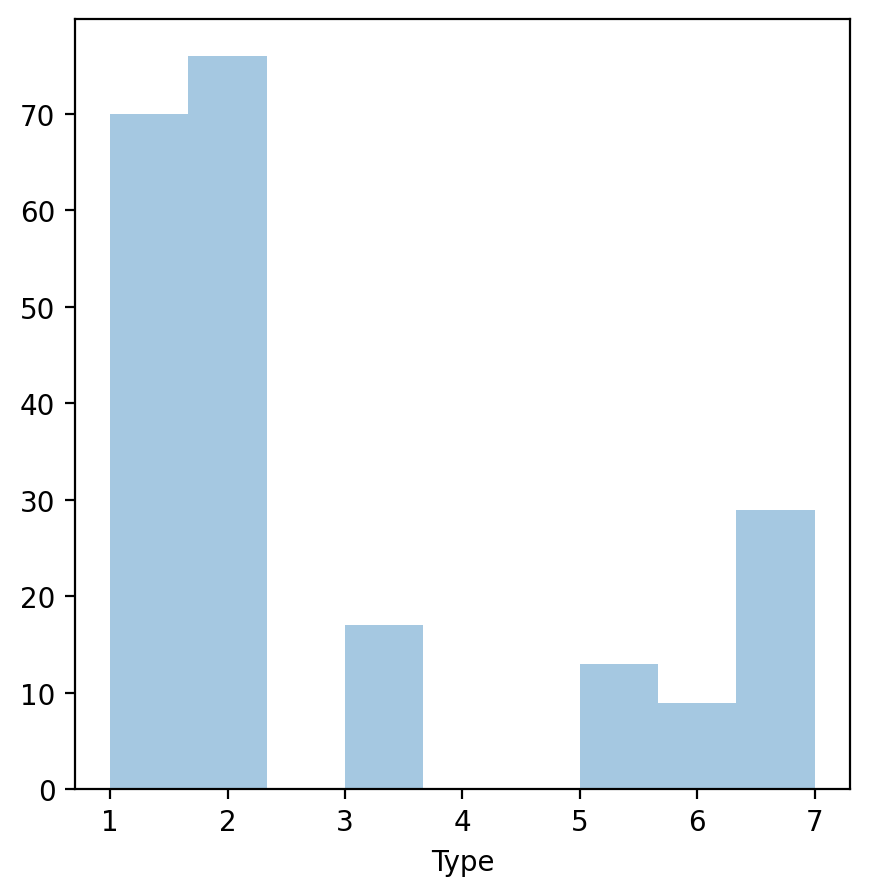

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图像大小和分辨率
plt.figure(figsize=(5, 5), dpi=200)  # 您可以调整这里的数值以适应您的需要

sns.distplot(Glass.Type, kde=False)

<Axes: xlabel='Type', ylabel='Mg'>

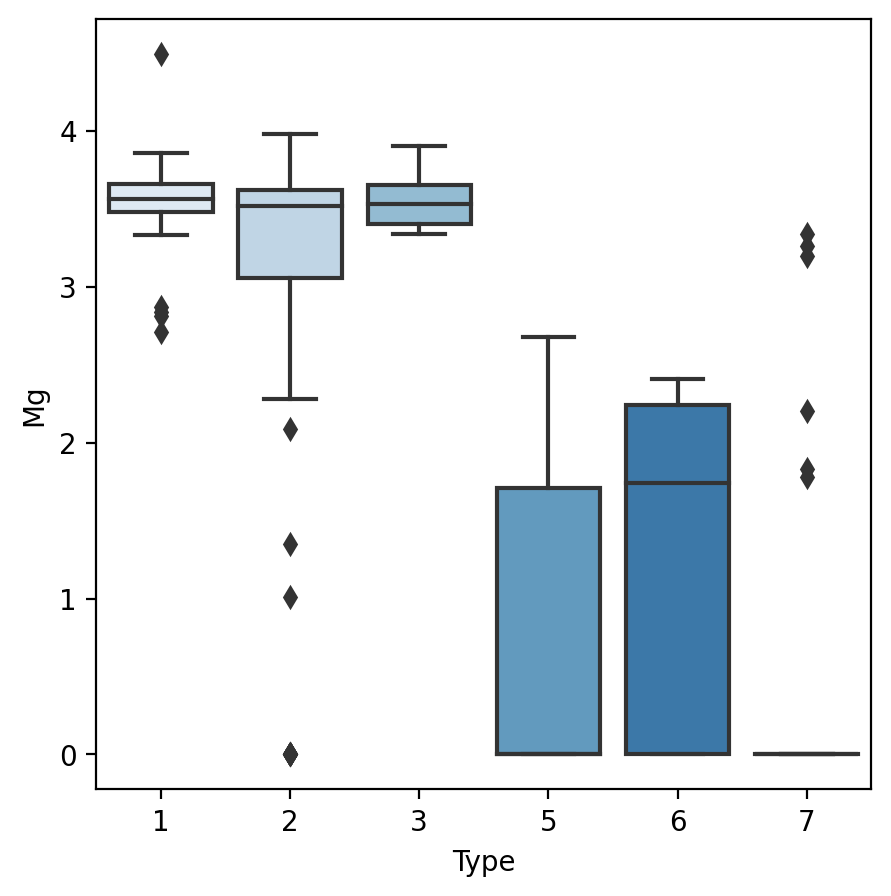

In [ ]:

# 设置图像大小和分辨率
plt.figure(figsize=(5, 5), dpi=200)  # 您可以调整这里的数值以适应您的需要

sns.boxplot(x='Type', y='Mg', data=Glass, palette='Blues')

#### 数据准备


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices


X=Glass.iloc[:,:-1]
y=Glass.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#### 多元逻辑回归拟合

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1e10, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=10000000000.0, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')

##### 考察迭代次数&截距项&回归系数

In [ ]:
print(model.n_iter_)
print(model.intercept_)
print(model.coef_)

[414]
[ 3.72689202e+03  3.81784623e+03  6.02478135e+03 -3.92554735e+03
 -7.11618703e+00 -9.63685607e+03]
[[-3.76424524e+03  1.42732390e+01  4.41659806e+01  5.62238618e+00
   1.66070637e+01  8.82601955e+01  4.89485893e+01  5.00614250e+01
   1.59029648e+02]
 [-3.46205202e+03  9.02393568e+00  3.75933001e+01  5.53583786e+00
   1.10263275e+01  8.23310715e+01  4.32743813e+01  5.88299178e+01
   1.60006606e+02]
 [-4.68008293e+03  7.52448443e+00  3.65686722e+01  1.76105768e+00
   6.55571397e+00  7.65583475e+01  4.28634327e+01  5.88236222e+01
   1.56920145e+02]
 [ 3.27499208e+03 -3.38550762e+01 -1.63761676e+01  2.22959434e+01
  -6.56542942e+00  6.80874913e+00 -1.09108847e+01  1.42395672e+01
   9.33190073e+01]
 [-1.25186820e+01  2.05341614e+01 -2.50993442e+01 -2.07517606e+00
   2.48671635e+00 -2.35007865e+02 -3.65116199e+01 -1.22305742e+02
  -1.26777848e+02]
 [ 8.64390679e+03 -1.75007441e+01 -7.68524411e+01 -3.31400491e+01
  -3.01103922e+01 -1.89504985e+01 -8.76638988e+01 -5.96487906e+01
  -4.424

#### 输出训练集概率与置信区间

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 假设 y_train 和 X_train 已经是正确的格式
# 构建和拟合模型
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1e10, max_iter=1000)
model.fit(X_train, y_train)

# 使用 predict 获取预测的类别
predicted_classes = model.predict(X_train)

# 使用 predict_proba 获取每个类别的概率
probabilities = model.predict_proba(X_train)

# 创建一个新的DataFrame来存储结果
y_train_2 = pd.DataFrame(y_train)  # 将实际值作为一列
y_train_2['Predicted_Class'] = predicted_classes  # 添加预测的类别

# 将每个类别的概率添加到DataFrame
for i in range(probabilities.shape[1]):
    y_train_2[f'Prob_Class_{i}'] = probabilities[:, i]

# 查看结果
y_train_2

,Type,Predicted_Class,Prob_Class_0,Prob_Class_1,Prob_Class_2,Prob_Class_3,Prob_Class_4,Prob_Class_5
69,1,1,9.042635e-01,8.032891e-02,1.540763e-02,1.391313e-28,1.151183e-54,1.697766e-60
164,5,5,3.377507e-05,2.787064e-03,5.002614e-05,9.971291e-01,2.285990e-83,3.219937e-28
147,3,1,3.979289e-01,2.889664e-01,3.131047e-01,4.336240e-19,2.260349e-60,1.022849e-21
64,1,1,8.497292e-01,1.139156e-01,3.635523e-02,1.304072e-28,4.012456e-54,6.013881e-60
182,6,6,6.330015e-36,1.702947e-32,1.851808e-33,1.297369e-10,9.999553e-01,4.474322e-05
...,...,...,...,...,...,...,...,...
112,2,2,9.420725e-02,8.829744e-01,2.281835e-02,3.176133e-15,1.548547e-86,8.615079e-77
85,2,2,3.030230e-01,4.010761e-01,2.959009e-01,4.259561e-13,1.402005e-42,2.289048e-15
212,7,7,1.393660e-66,3.103508e-54,5.768541e-55,4.704901e-26,2.318079e-68,1.000000e+00
177,6,6,7.096831e-07,9.344108e-07,4.926697e-07,1.261389e-14,9.999979e-01,5.461691e-16


#### 输出测试集概率与置信区间

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 假设 y_train 和 X_train 已经是正确的格式
# 构建和拟合模型
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1e10, max_iter=1000)
model.fit(X_train, y_train)

# 使用 predict 获取预测的类别
predicted_classes = model.predict(X_test)

# 使用 predict_proba 获取每个类别的概率
probabilities = model.predict_proba(X_test)

# 创建一个新的DataFrame来存储结果
y_train_3 = pd.DataFrame(y_test)  # 将实际值作为一列
y_train_3['Predicted_Class'] = predicted_classes  # 添加预测的类别

# 将每个类别的概率添加到DataFrame
for i in range(probabilities.shape[1]):
    y_train_3[f'Prob_Class_{i}'] = probabilities[:, i]

# 查看结果
y_train_3

,Type,Predicted_Class,Prob_Class_0,Prob_Class_1,Prob_Class_2,Prob_Class_3,Prob_Class_4,Prob_Class_5
37,1,1,5.911748e-01,3.928357e-01,1.598951e-02,2.498995e-14,2.749643e-83,3.059293e-31
185,7,7,1.968269e-15,7.565555e-08,6.659661e-09,1.831661e-30,6.305083e-224,9.999999e-01
172,5,2,1.193273e-04,9.998807e-01,3.198680e-10,3.271681e-63,0.000000e+00,4.738433e-19
204,7,7,7.441205e-87,4.169852e-79,5.251797e-80,9.510330e-46,5.275115e-28,1.000000e+00
148,3,1,5.895637e-01,3.151078e-01,9.532850e-02,5.570242e-22,1.744782e-77,4.179208e-53
...,...,...,...,...,...,...,...,...
132,2,1,7.483974e-01,2.105961e-01,4.100649e-02,6.607684e-22,1.523439e-64,1.933069e-19
180,6,6,4.673254e-87,3.120396e-86,6.791264e-87,2.981649e-68,1.000000e+00,1.262996e-16
141,2,2,4.872277e-01,4.901275e-01,2.264476e-02,8.515702e-24,5.213121e-92,1.025362e-64
76,2,2,1.427487e-01,5.436465e-01,3.136048e-01,2.437196e-14,3.276230e-64,1.531561e-10


#### 考察预测精度

In [ ]:
## 基于测试集
model.score(X_test,y_test)

0.6

#### 输出测试集混淆矩阵

In [ ]:
prob = model.predict_proba(X_test)
prob[:3]

array([[5.91174784e-001, 3.92835709e-001, 1.59895066e-002,
        2.49899498e-014, 2.74964269e-083, 3.05929293e-031],
       [1.96826878e-015, 7.56555535e-008, 6.65966102e-009,
        1.83166122e-030, 6.30508345e-224, 9.99999918e-001],
       [1.19327308e-004, 9.99880672e-001, 3.19868030e-010,
        3.27168096e-063, 0.00000000e+000, 4.73843258e-019]])

In [ ]:
pred = model.predict(X_test)
pred[:3]

array([1, 7, 2])

In [ ]:
table=confusion_matrix(y_test,pred)
table

table=pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted'])
table

Predicted,1,2,3,5,6,7
Actual,,,,,,
1,14,2,2,0,1,2
2,5,13,0,2,2,1
3,5,0,0,0,0,0
5,0,3,0,1,0,0
6,0,0,0,0,3,0
7,0,0,0,1,0,8


In [ ]:
table=pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['Predicted'],normalize='index')
table

Predicted,1,2,3,5,6,7
Actual,,,,,,
1,0.666667,0.095238,0.095238,0.000000,0.047619,0.095238
2,0.217391,0.565217,0.000000,0.086957,0.086957,0.043478
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.750000,0.000000,0.250000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
7,0.000000,0.000000,0.000000,0.111111,0.000000,0.888889


#### softmax函数通过线性得分求概率

In [ ]:
import numpy as np

# 假设linear_scores是每个类别的线性得分
linear_scores = np.array([2.0, 1.0, 0.5])

# 计算指数得分
exp_scores = np.exp(linear_scores)

# 计算所有指数得分的总和
sum_exp_scores = np.sum(exp_scores)

# 计算每个类别的概率
probabilities = exp_scores / sum_exp_scores

print(probabilities)


[0.62853172 0.2312239  0.14024438]


### 多元逻辑回归，保留带有主键的分析

#### 数据准备

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

drive.mount('/content/drive')
example=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Python_ML_Data/example_dataset.xlsx')
example.head()

Mounted at /content/drive


,ID,Feature1,Feature2,Feature3,Target
0,1,0.548814,0.677817,0.311796,0
1,2,0.715189,0.270008,0.696343,2
2,3,0.602763,0.735194,0.377752,0
3,4,0.544883,0.962189,0.179604,2
4,5,0.423655,0.248753,0.024679,1


#### Y的训练集与测试集保留主键

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 首先，确保主键列不是索引
example = example.reset_index(drop=True)

# 保留一个带有主键和目标变量的副本
keys_and_target = example[['ID', 'Target']]  # 'Target' 是目标变量的列名

# 分离特征和目标变量，确保不包括主键列
X = example.drop(['ID', 'Target'], axis=1)
y = example['Target']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 训练模型
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

# 进行预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 将预测结果添加到带有主键的DataFrame中
train_results = keys_and_target[keys_and_target.index.isin(X_train.index)]
train_results['Predicted'] = y_pred_train

test_results = keys_and_target[keys_and_target.index.isin(X_test.index)]
test_results['Predicted'] = y_pred_test

# 查看带有主键的训练集和测试集结果
train_results

<ipython-input-2-baad9d99ead8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_results['Predicted'] = y_pred_train
<ipython-input-2-baad9d99ead8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['Predicted'] = y_pred_test


,ID,Target,Predicted
0,1,0,1
1,2,2,2
2,3,0,0
4,5,1,2
5,6,0,2
...,...,...,...
94,95,2,2
95,96,2,2
96,97,0,1
98,99,2,1


In [ ]:
test_results

,ID,Target,Predicted
3,4,2,1
9,10,2,0
14,15,2,1
17,18,0,1
18,19,0,1
22,23,2,1
26,27,0,0
30,31,2,0
32,33,0,2
36,37,1,0


#### 训练集保留主键、特征、实际值、预测值

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 假设 df 是您的原始数据集，包含主键、特征和目标变量
# 例如，df 结构为：ID, Feature1, Feature2, Feature3, Target
df=example.reset_index(drop=True)

# 分离特征和目标变量，同时保留主键列
X = df.drop('Target', axis=1)
y = df['Target']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = LogisticRegression()
model.fit(X_train.drop('ID', axis=1), y_train) # 确保不使用主键来训练模型

# 对训练集进行预测
y_pred_train = model.predict(X_train.drop('ID', axis=1))

# 创建包含主键、特征、目标值和预测值的DataFrame
train_results = X_train.copy()
train_results['Actual_Target'] = y_train
train_results['Predicted_Target'] = y_pred_train

# 查看结果
train_results

,ID,Feature1,Feature2,Feature3,Actual_Target,Predicted_Target
11,12,0.528895,0.846409,0.216897,1,1
47,48,0.128926,0.919483,0.183280,0,1
85,86,0.265389,0.613966,0.148141,1,1
28,29,0.521848,0.660174,0.947371,0,2
93,94,0.716327,0.944372,0.189848,2,0
...,...,...,...,...,...,...
60,61,0.158970,0.697429,0.240829,2,1
71,72,0.468651,0.054338,0.876505,1,1
14,15,0.071036,0.813798,0.020651,2,1
92,93,0.131798,0.186193,0.822118,2,1


#### 测试集保留主键、特征、实际值、预测值

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 假设 df 是您的原始数据集，包含主键、特征和目标变量
# 例如，df 结构为：ID, Feature1, Feature2, Feature3, Target
df=example.reset_index(drop=True)

# 分离特征和目标变量，同时保留主键列
X = df.drop('Target', axis=1)
y = df['Target']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = LogisticRegression()
model.fit(X_train.drop('ID', axis=1), y_train) # 确保不使用主键来训练模型

# 对测试集进行预测
y_pred_test = model.predict(X_test.drop('ID', axis=1))

# 创建包含主键、特征、目标值和预测值的DataFrame
test_results = X_test.copy()
test_results['Actual_Target'] = y_test
test_results['Predicted_Target'] = y_pred_test

# 查看结果
test_results

,ID,Feature1,Feature2,Feature3,Actual_Target,Predicted_Target
83,84,0.692472,0.237893,0.013237,2,1
53,54,0.102045,0.615560,0.748664,0,2
70,71,0.976459,0.521037,0.977495,2,0
45,46,0.670638,0.703889,0.396060,2,1
44,45,0.666767,0.806194,0.716860,0,0
39,40,0.681820,0.431418,0.586784,2,1
22,23,0.461479,0.956084,0.273542,2,0
80,81,0.317983,0.164694,0.293020,1,1
10,11,0.791725,0.447125,0.990339,2,0
0,1,0.548814,0.677817,0.311796,0,1


#### 混淆矩阵与热图

In [ ]:
table=pd.crosstab(y_test,y_pred_test,rownames=['Actual'],colnames=['Predicted'])
table

Predicted,0,1,2
Actual,,,
0,0.272727,0.545455,0.181818
1,0.000000,0.857143,0.142857
2,0.333333,0.500000,0.166667


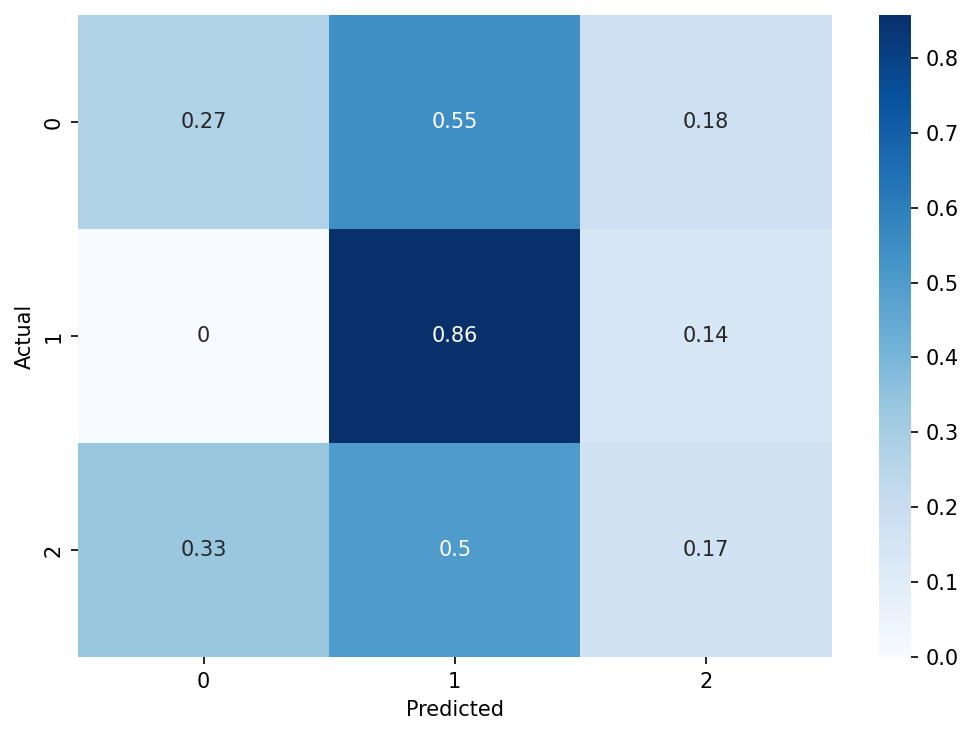

In [ ]:
# 设置图像大小和分辨率
plt.figure(figsize=(7, 5), dpi=150)
sns.heatmap(table,cmap='Blues',annot=True)
plt.tight_layout()

#### Classification输出预测指标

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.33      0.86      0.48         7
           2       0.40      0.17      0.24        12

    accuracy                           0.37        30
   macro avg       0.39      0.43      0.35        30
weighted avg       0.39      0.37      0.33        30



#### Kappa指标

In [ ]:
cohen_kappa_score(y_test,y_pred_test)

0.10518053375196224

###### 注：Cohen's Kappa 分数

Kappa 分数的一般解释如下：

< 0: 没有一致性。
0.01–0.20: 轻微的一致性。
0.21–0.40: 公平的一致性。
0.41–0.60: 中等的一致性。
0.61–0.80: 显著的一致性。
0.81–0.99: 几乎完美的一致性。
1: 完美一致性。
因此，若Kappa 分数为 0.2 意味着你的模型预测与实际结果之间的一致性比随机猜测略好，但这种一致性仍然很低。这可能表明模型有一定的预测能力，但远未达到理想的水平。在实际应用中，你可能需要进一步调整模型、特征选择或数据处理方法，以提高模型的性能。

## 判别分析

## 因果推断

### Rubin Causal Model (RCM) 推断的标准步骤与框架

Rubin Causal Model (RCM), 也称作潜在结果框架（Potential Outcomes Framework），是因果推断领域的核心理论之一。以下是根据当前权威文献的综述，RCM 推断的标准步骤和框架：

1. 定义潜在结果（Potential Outcomes）
- **概念**: 对于每个个体，定义在不同处理（如治疗或干预）下可能发生的结果。
- **表示**: 通常表示为 `Y_i(1)` 和 `Y_i(0)`，分别代表个体 `i` 在处理和对照条件下的潜在结果。

2. 假设潜在结果的独立性（SUTVA）
- **SUTVA（Stable Unit Treatment Value Assumption）**: 假设一个个体的潜在结果只取决于该个体接受的治疗，不受其他个体治疗状态的影响。

3. 确定因果效应的类型
- **个体层面**: `Y_i(1) - Y_i(0)` 表示个体层面的因果效应。
- **群体层面**: 平均治疗效应（ATE），即所有个体在处理和对照情况下潜在结果的平均差异。

4. 选择适当的研究设计
- **随机控制试验（RCTs）**: 在可行的情况下，RCTs 是估计因果效应的黄金标准。
- **观察性研究**: 当RCTs 不可行时，使用观察性数据，需要额外的统计方法来控制混杂因素，如倾向得分匹配、工具变量等。

5. 控制混杂因素
- **方法**: 通过匹配、回归调整、分层或使用工具变量等方法，控制那些可能影响治疗分配和结果的混杂变量。

6. 估计因果效应
- **基于模型的估计**: 使用统计模型（如线性回归、逻辑回归等）来估计处理效应。
- **无模型估计**: 如倾向得分匹配后的直接比较。

7. 灵敏度分析
- 检验结果对潜在未观察混杂因素的敏感性。

8. 结果解释与推广
- **因果推断**: 根据以上分析，做出因果关系的推断。
- **推广性**: 考虑研究结果是否可以推广到更广泛的人群。


### 建立模拟数据集

In [ ]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 1000

# Generating a simulated dataset
# Treatment variable (0 or 1)
treatment = np.random.binomial(1, 0.5, n_samples)

# Confounding variables
age = np.random.normal(50, 12, n_samples)  # Age with mean 50 and std 12
income = np.random.normal(50000, 10000, n_samples)  # Income with mean 50000 and std 10000

# Outcome variable (simulated with some dependence on treatment and confounders)
outcome = 2 * treatment + 0.03 * age + 0.0001 * income + np.random.normal(0, 10, n_samples)

# Creating the DataFrame
data = pd.DataFrame({
    'treatment': treatment,
    'age': age,
    'income': income,
    'outcome': outcome
})

# Displaying the first few rows of the dataframe
data

,treatment,age,income,outcome
0,1,48.779633,60013.310173,-2.179765
1,1,50.231353,55972.125044,-3.680985
2,1,72.195095,41847.243389,-2.097586
3,1,47.430000,68012.139908,18.123163
4,0,44.011800,52152.404676,17.558420
...,...,...,...,...
995,0,49.884113,44729.083898,24.873469
996,1,28.434025,44637.298559,4.213642
997,1,40.372962,62098.372222,10.468577
998,0,52.318563,38734.105741,-4.651038


### 步骤一：定义潜在结果（概念理解）

潜在结果: 在我们的数据集中，我们可以假设对于每个个体，有两个潜在结果：

Y_i(1): 如果个体接受了治疗（treatment = 1），他们会有一个潜在结果。
Y_i(0): 如果个体没有接受治疗（treatment = 0），他们会有一个不同的潜在结果。
数据中的观察: 在实际的数据集中，对于每个个体，我们只能观察到一个结果 —— 要么是在治疗状态下的结果，要么是在未治疗状态下的结果。

Python中的表示
在Python中，我们无法直接创建这两个潜在结果的完整列，因为它们是部分未观察的。但我们可以根据我们的模型（或假设）来推断这些潜在结果。例如，如果我们假设治疗对结果的影响是均匀的，我们可以尝试构建这些潜在结果的模拟版本。

In [ ]:
import pandas as pd
import numpy as np

# 假设我们已经有了数据集 data
# 示例数据集结构: ['treatment', 'age', 'income', 'outcome']

# 假设模型：治疗对结果的固定影响
treatment_effect = 2.0

# 构建潜在结果的估计
# 对于接受治疗的个体，我们观察到了他们的 Y_i(1)
# 对于未接受治疗的个体，我们观察到了他们的 Y_i(0)
# 我们可以估计没有观察到的潜在结果：
# Y_i(0) 的估计 = 观察到的结果 - 治疗效应（对于接受治疗的个体）
# Y_i(1) 的估计 = 观察到的结果 + 治疗效应（对于未接受治疗的个体）

data['estimated_Y0'] = np.where(data['treatment'] == 1, data['outcome'] - treatment_effect, data['outcome'])
data['estimated_Y1'] = np.where(data['treatment'] == 0, data['outcome'] + treatment_effect, data['outcome'])

# 现在 data 中有了我们对每个个体在两种情况下潜在结果的估计
data

,treatment,age,income,outcome,estimated_Y0,estimated_Y1
0,1,48.779633,60013.310173,-2.179765,-4.179765,-2.179765
1,1,50.231353,55972.125044,-3.680985,-5.680985,-3.680985
2,1,72.195095,41847.243389,-2.097586,-4.097586,-2.097586
3,1,47.430000,68012.139908,18.123163,16.123163,18.123163
4,0,44.011800,52152.404676,17.558420,17.558420,19.558420
...,...,...,...,...,...,...
995,0,49.884113,44729.083898,24.873469,24.873469,26.873469
996,1,28.434025,44637.298559,4.213642,2.213642,4.213642
997,1,40.372962,62098.372222,10.468577,8.468577,10.468577
998,0,52.318563,38734.105741,-4.651038,-4.651038,-2.651038


#### 注：np.where(条件, 真时的选择, 假时的选择)
类似excel IF

### 步骤二：假设潜在结果的独立性（SUTVA）

在 Rubin Causal Model (RCM) 的第二步中，我们需要考虑 SUTVA（Stable Unit Treatment Value Assumption）的假设。SUTVA 是因果推断中的一个关键假设，涉及两个主要方面：

单一版本的处理：假设对于每个受试者来说，"处理"只有一个版本，且这个处理的效果对每个受试者来说是相同的。换句话说，这意味着不存在多种形式的处理，这可能会导致不同的结果。

无干扰（No Interference）：一个个体的潜在结果仅由该个体是否接受治疗决定，不受其他个体是否接受治疗的影响。例如，在医学试验中，一个患者的健康结果应该只依赖于他们自己是否接受了治疗，而不是依赖于其他患者是否接受了同样的治疗。

在实际操作中，SUTVA 假设可能不总是完全成立，特别是在存在处理之间相互作用或不同处理方式的情况下。然而，在很多研究设计中，尤其是在随机控制试验中，SUTVA 是一个合理的近似。

在 Python 中应用 SUTVA
在之前创建的数据集中，我们假设每个个体要么接受治疗（treatment = 1），要么不接受治疗（treatment = 0），并且治疗对每个个体的影响是一致的。因此，我们的数据集已经隐含地符合 SUTVA 的假设。

在代码层面，通常不需要特别的操作来实施 SUTVA 假设，因为这更多是在设计研究和解释结果时需要考虑的概念性假设。但是，我们应该在分析过程中保持对这一假设的批判性理解，特别是当分析观察性数据时，我们需要注意可能违反 SUTVA 假设的情况。

在下一步中，我们将继续探讨如何在数据集上确定和估计因果效应。

### 步骤三：确定因果效应的类型

在 Rubin Causal Model (RCM) 的第三步中，我们需要确定我们想要估计的因果效应的类型。在因果推断中，主要关注两种类型的因果效应：个体层面的效应和群体层面的效应。

1. 个体层面的因果效应
- **定义**: 对于每个个体，其因果效应是在不同处理状态下潜在结果的差异。数学上表示为 `Y_i(1) - Y_i(0)`，其中 `Y_i(1)` 和 `Y_i(0)` 分别是个体 `i` 在接受和不接受治疗的情况下的潜在结果。
- **挑战**: 在实际情况中，我们无法同时观察到同一个个体在接受和不接受治疗的情况下的结果（即反事实问题），因此个体层面的因果效应通常无法直接估计。

2. 群体层面的因果效应
- **平均治疗效应 (ATE)**: 这是最常见的群体层面因果效应指标。它是所有个体在接受治疗和不接受治疗情况下潜在结果差异的平均值，数学上表示为 `E[Y(1) - Y(0)]`。
- **条件平均治疗效应 (CATE)**: 在特定子群体中的平均治疗效应，比如在不同性别、年龄或其他特征中的ATE。
- **局部平均治疗效应 (LATE)**: 在那些因为工具变量而改变治疗状态的个体中的平均治疗效应。

3. 在 Python 中应用
在我们的模拟数据集中，我们可以尝试估计平均治疗效应 (ATE)。由于我们不能直接观察到每个个体的两种潜在结果，我们通常会用统计方法来估计这个效应。以下是一个简单的示例，展示如何用 Python 估计 ATE：


#### 绝对理想状态

In [ ]:
# 计算处理组和对照组的平均结果
average_outcome_treated = data[data['treatment'] == 1]['outcome'].mean()
average_outcome_control = data[data['treatment'] == 0]['outcome'].mean()

# 计算平均治疗效应 (ATE)
ate = average_outcome_treated - average_outcome_control

print(f"Estimated Average Treatment Effect (ATE): {ate}")

Estimated Average Treatment Effect (ATE): 2.0877040682075654


### 步骤四：选择适当的研究设计

在 Rubin Causal Model (RCM) 的第四步中，我们关注于选择一个合适的研究设计来估计因果效应。这一步是至关重要的，因为不同的研究设计对因果推断的可信度和可解释性有着显著影响。

随机控制试验（RCTs）
定义: RCTs 是通过随机分配受试者到治疗组或对照组的方法。这种设计可以有效地控制已知和未知的混杂因素。
优势: RCTs 被认为是估计因果效应的“黄金标准”，因为随机化减少了偏倚的风险。
局限性: 在某些情况下，进行RCTs 可能不切实际或不道德，如在涉及严重疾病的治疗研究中。
观察性研究
定义: 当RCTs 不可行时，研究者可能会转向观察性研究，即使用非随机化的数据来进行分析。
挑战: 观察性研究中的主要挑战是混杂因素的存在，这可能导致治疗效应的估计产生偏倚。
解决方法: 采用统计技术，如回归分析、倾向得分匹配、工具变量分析等，来尝试控制混杂因素的影响。
在 Python 中的应用
在我们的模拟数据集上，如果假设这是一个观察性研究的数据，那么我们需要注意可能存在的混杂因素。例如，个体的年龄和收入可能影响他们接受治疗的概率以及治疗的效果。为了控制这些潜在的混杂因素，我们可能会考虑使用倾向得分匹配或包含这些变量的回归模型来估计平均治疗效应。

在下一步，我们将讨论如何控制混杂因素，并使用具体的统计方法来估计因果效应。

### 步骤五：控制混杂因素

在 Rubin Causal Model (RCM) 的第五步中，我们关注于控制混杂因素。混杂因素是那些同时影响治疗分配和结果的变量，它们可能导致估计的因果效应出现偏倚。在观察性研究中，控制混杂因素尤为重要，因为治疗的分配不是随机的。

控制混杂因素的方法
回归调整: 通过包括混杂变量作为协变量的回归模型来估计处理效应。
倾向得分匹配: 首先估计每个个体接受治疗的概率（倾向得分），然后匹配类似倾向得分的治疗组和对照组个体。
工具变量方法: 当处理分配和潜在结果之间存在混杂时，使用工具变量来估计处理效应。
分层分析: 将数据分为不同的层或组，每组具有相似的混杂因素水平，然后在每组内进行分析。
在 Python 中的应用
假设我们正在处理的模拟数据集是观察性的，我们可以使用回归调整或倾向得分匹配来控制混杂因素。下面是一个简单的示例，展示如何使用线性回归进行回归调整：

In [ ]:
import statsmodels.api as sm

# 假设模拟数据集中的列有 'treatment', 'age', 'income', 'outcome'
# 使用线性回归模型，包括混杂变量
X = data[['treatment', 'age', 'income']]  # 自变量包括治疗和混杂因素
y = data['outcome']  # 因变量

# 添加常数项以进行OLS回归
X = sm.add_constant(X)

# 构建并拟合模型
model = sm.OLS(y, X).fit()

# 查看模型结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.789
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           9.37e-06
Time:                        11:56:21   Log-Likelihood:                -3723.4
No. Observations:                1000   AIC:                             7455.
Df Residuals:                     996   BIC:                             7474.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1730      2.215     -0.530      0.5

### 步骤六：估计因果效应

在 Rubin Causal Model (RCM) 的第六步中，我们专注于估计因果效应。这一步是将前面的所有准备工作应用于具体的数据分析中，以得到关于治疗或干预效应的估计。

估计方法
基于模型的估计:

使用统计模型（如线性回归、逻辑回归等）来估计处理效应。
在模型中包括处理变量（如治疗或干预）和可能的混杂变量。
无模型估计:

当数据来自随机控制试验时，直接比较处理组和对照组的结果。
在观察性研究中，使用匹配方法（如倾向得分匹配）后直接比较匹配组的结果。
在 Python 中的应用
假设我们已经在上一步中使用线性回归模型控制了混杂因素。现在，我们可以查看该模型中治疗变量的系数，这通常被解释为处理效应的估计值。例如，如果我们使用了上一步中的线性回归模型，治疗变量的系数就是我们感兴趣的因果效应的估计。

In [ ]:
# 使用上一步构建的模型
# 模型系数提供了处理效应的估计
treatment_effect_estimate = model.params['treatment']

print(f"Estimated Treatment Effect: {treatment_effect_estimate}")

Estimated Treatment Effect: 2.061232852233525


### 步骤七：灵敏度分析

在 Rubin Causal Model (RCM) 的第七步中，我们进行灵敏度分析。这一步骤是关键的，因为它帮助我们理解和评估我们的因果推断结果对于潜在未观察混杂因素的敏感性。灵敏度分析可以揭示，如果存在未被模型捕捉到的混杂因素，我们的结论可能会有多大程度的变化。

灵敏度分析的重要性
可靠性评估: 确定因果估计的稳健性，即在可能遗漏的重要变量的情况下，结果是否仍然保持一致。
透明度提升: 提供更全面的分析结果，增强研究的信誉度。
灵敏度分析的方法
变量影响分析:

评估未包括的变量如果被包括，可能对结果产生多大影响。
通过模拟不同程度的混杂变量影响，看结果的变化。
使用特定的统计方法:

如使用 Rosenbaum bounds 等专门的灵敏度分析方法。
这些方法可以帮助评估在存在潜在未观察混杂因素时，结果的稳定性。
在 Python 中的应用
虽然灵敏度分析可能相当复杂，但以下是一个简化的示例，展示如何进行基本的灵敏度分析：

In [ ]:
# 假设原始的处理效应估计为 treatment_effect_estimate
original_estimate = treatment_effect_estimate

# 假设一个潜在的混杂变量，可能改变处理效应估计 10%
potential_confounder_impact = 0.1 * original_estimate

# 调整原始估计，考虑潜在混杂变量的影响
adjusted_estimate = original_estimate + potential_confounder_impact

print(f"Original Estimate: {original_estimate}")
print(f"Adjusted Estimate (with potential confounder): {adjusted_estimate}")

Original Estimate: 2.061232852233525
Adjusted Estimate (with potential confounder): 2.2673561374568774


### 步骤八：结果解释与推广

在 Rubin Causal Model (RCM) 的最后一步中，我们关注于对因果推断结果的解释和推广。这一步骤是整个因果推断过程中至关重要的，因为它涉及到如何理解和应用我们的研究发现。

结果解释
准确性: 确保解释结果时考虑了所有相关的统计信息，包括估计的效应大小、置信区间、p值等。
因果关系: 解释因果效应时需谨慎，特别是在观察性研究中。强调结果基于特定的假设和模型。
混杂因素: 讨论可能存在的未观察混杂因素对结果的潜在影响，以及进行的灵敏度分析。
推广性
总体外推广: 讨论研究结果是否适用于更广泛的人群或情境。例如，如果样本只包含某一特定人群，那么结果可能不适用于其他人群。
政策含义: 如果适用，讨论研究结果对于政策制定或实践的潜在影响。
在 Python 中的应用
在 Python 中，对结果的解释通常是对前面步骤中生成的统计输出的解释。例如，如果我们使用了线性回归模型来估计治疗效应，我们可以解释模型系数作为治疗效应的估计，并讨论其统计显著性和置信区间。

In [ ]:
# 使用前面步骤中的模型结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     8.789
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           9.37e-06
Time:                        12:22:56   Log-Likelihood:                -3723.4
No. Observations:                1000   AIC:                             7455.
Df Residuals:                     996   BIC:                             7474.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1730      2.215     -0.530      0.5

## Dowhy 包进行因果推断

In [ ]:
## 安装DOWHYY

!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


In [ ]:
from dowhy import CausalModel
import dowhy.datasets

# Generate some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000)

# Step 1: Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# Step 2: Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Step 3: Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Step 4: Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

In [ ]:
import networkx as nx, numpy as np, pandas as pd
from dowhy import gcm

# Let's generate some "normal" data we assume we're given from our problem domain:
X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(dict(X=X, Y=Y, Z=Z))

# Step 1: Model our system:
causal_model = gcm.StructuralCausalModel(nx.DiGraph([('X', 'Y'), ('Y', 'Z')]))
gcm.auto.assign_causal_mechanisms(causal_model, data)

# Step 2: Train our causal model with the data from above:
gcm.fit(causal_model, data)

# Step 3: Perform a causal analysis. E.g. we have an:
anomalous_record = pd.DataFrame(dict(X=[.7], Y=[100.0], Z=[303.0]))
# ... and would like to answer the question:
# "Which node is the root cause of the anomaly in Z?":
anomaly_attribution = gcm.attribute_anomalies(causal_model, "Z", anomalous_record)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 93.91it/s]
Evaluate set function: 8it [00:00, 46.45it/s]


In [ ]:
anomaly_attribution

{'X': array([0.]), 'Y': array([4.00335042]), 'Z': array([4.00335042])}

### 简单causal inference 案例



In [ ]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [ ]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.358225,0.0,0.734006,-0.322797,-1.617003,-2.630650,2.003331,0,True,7.198506
1,0.134510,0.0,0.096550,0.725873,-0.915171,-1.246210,1.466977,2,True,17.511336
2,0.120302,0.0,0.050899,-0.496421,-1.266971,-0.808110,0.822598,2,False,5.835058
3,1.764986,0.0,0.798441,0.829790,-0.828147,-2.584354,-0.626298,3,False,10.262997
4,0.112397,0.0,0.945333,1.242384,0.557659,0.006489,-0.599470,1,True,15.604818
...,...,...,...,...,...,...,...,...,...,...
4995,-0.313455,0.0,0.023559,-0.734428,-2.031904,-0.478838,1.398829,0,False,-3.030724
4996,0.897965,0.0,0.217317,1.282344,0.249297,-0.443686,-0.132172,3,True,23.500784
4997,0.406787,0.0,0.018760,1.290957,-1.714790,-0.914111,-0.691295,0,False,-1.870330
4998,-0.515723,0.0,0.073480,0.395349,-0.878890,1.123787,-0.071686,2,False,7.495244


In [ ]:
df.dtypes

X0     float64
Z0     float64
Z1     float64
W0     float64
W1     float64
W2     float64
W3     float64
W4    category
v0        bool
y      float64
dtype: object

In [ ]:
data

{'df':             X0   Z0        Z1        W0        W1        W2        W3 W4  \
 0    -0.358225  0.0  0.734006 -0.322797 -1.617003 -2.630650  2.003331  0   
 1     0.134510  0.0  0.096550  0.725873 -0.915171 -1.246210  1.466977  2   
 2     0.120302  0.0  0.050899 -0.496421 -1.266971 -0.808110  0.822598  2   
 3     1.764986  0.0  0.798441  0.829790 -0.828147 -2.584354 -0.626298  3   
 4     0.112397  0.0  0.945333  1.242384  0.557659  0.006489 -0.599470  1   
 ...        ...  ...       ...       ...       ...       ...       ... ..   
 4995 -0.313455  0.0  0.023559 -0.734428 -2.031904 -0.478838  1.398829  0   
 4996  0.897965  0.0  0.217317  1.282344  0.249297 -0.443686 -0.132172  3   
 4997  0.406787  0.0  0.018760  1.290957 -1.714790 -0.914111 -0.691295  0   
 4998 -0.515723  0.0  0.073480  0.395349 -0.878890  1.123787 -0.071686  2   
 4999  0.723713  0.0  0.855830  0.501283  0.974346  0.563194 -0.482686  2   
 
          v0          y  
 0      True   7.198506  
 1      True  17

In [ ]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

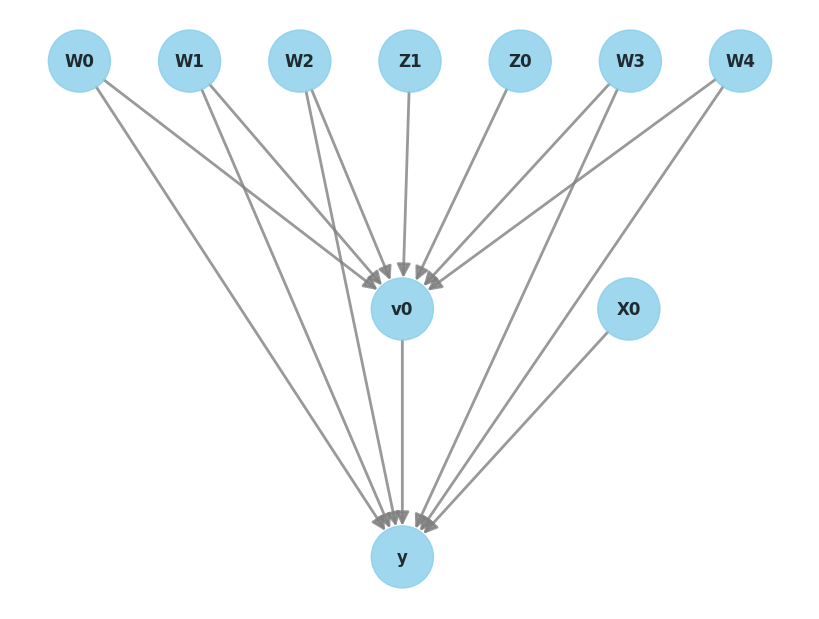

In [ ]:
model.view_model()

### 真实causal inference 案例1：Hotel Booking Cancellations


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dowhy

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Total stay in nights
dataset['total_stay'] = dataset['stays_in_week_nights']+dataset['stays_in_weekend_nights']
# Total number of guests
dataset['guests'] = dataset['adults']+dataset['children'] +dataset['babies']
# Creating the different_room_assigned feature
dataset['different_room_assigned']=0
slice_indices =dataset['reserved_room_type']!=dataset['assigned_room_type']
dataset.loc[slice_indices,'different_room_assigned']=1
# Deleting older features
dataset = dataset.drop(['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies'
                        ,'reserved_room_type','assigned_room_type'],axis=1)
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,guests,different_room_assigned
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,BB,BEL,Offline TA/TO,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0,0
119386,City Hotel,0,102,2017,August,35,31,BB,FRA,Online TA,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0,0
119387,City Hotel,0,34,2017,August,35,31,BB,DEU,Online TA,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0,0
119388,City Hotel,0,109,2017,August,35,31,BB,GBR,Online TA,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0,0


In [ ]:
dataset.isnull().sum() # Country,Agent,Company contain 488,16340,112593 missing entries
dataset = dataset.drop(['agent','company'],axis=1)
# Replacing missing countries with most freqently occuring countries
dataset['country']= dataset['country'].fillna(dataset['country'].mode()[0])
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,guests,different_room_assigned
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,BB,BEL,Offline TA/TO,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0,0
119386,City Hotel,0,102,2017,August,35,31,BB,FRA,Online TA,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0,0
119387,City Hotel,0,34,2017,August,35,31,BB,DEU,Online TA,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0,0
119388,City Hotel,0,109,2017,August,35,31,BB,GBR,Online TA,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0,0


In [ ]:
dataset = dataset.drop(['reservation_status','reservation_status_date','arrival_date_day_of_month'],axis=1)
dataset = dataset.drop(['arrival_date_year'],axis=1)
dataset = dataset.drop(['distribution_channel'], axis=1)

In [ ]:
# Replacing 1 by True and 0 by False for the experiment and outcome variables
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(1,True)
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(0,False)
dataset['is_canceled']= dataset['is_canceled'].replace(1,True)
dataset['is_canceled']= dataset['is_canceled'].replace(0,False)
dataset.dropna(inplace=True)
print(dataset.columns)
dataset.iloc[:, 5:20].head(100)
dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.00,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.00,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.00,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,August,35,BB,BEL,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,96.14,0,0,7,2.0,False
119386,City Hotel,False,102,August,35,BB,FRA,Online TA,0,0,...,0,No Deposit,0,Transient,225.43,0,2,7,3.0,False
119387,City Hotel,False,34,August,35,BB,DEU,Online TA,0,0,...,0,No Deposit,0,Transient,157.71,0,4,7,2.0,False
119388,City Hotel,False,109,August,35,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,104.40,0,0,7,2.0,False


In [ ]:
dataset = dataset[dataset.deposit_type=="No Deposit"]
dataset.groupby(['deposit_type','is_canceled']).count().reset_index()

,deposit_type,is_canceled,hotel,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,No Deposit,False,74947,74947,74947,74947,74947,74947,74947,74947,...,74947,74947,74947,74947,74947,74947,74947,74947,74947,74947
1,No Deposit,True,29690,29690,29690,29690,29690,29690,29690,29690,...,29690,29690,29690,29690,29690,29690,29690,29690,29690,29690


In [ ]:
dataset_copy = dataset.copy(deep=True)
dataset_copy

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.00,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.00,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.00,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,August,35,BB,BEL,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,96.14,0,0,7,2.0,False
119386,City Hotel,False,102,August,35,BB,FRA,Online TA,0,0,...,0,No Deposit,0,Transient,225.43,0,2,7,3.0,False
119387,City Hotel,False,34,August,35,BB,DEU,Online TA,0,0,...,0,No Deposit,0,Transient,157.71,0,4,7,2.0,False
119388,City Hotel,False,109,August,35,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,104.40,0,0,7,2.0,False


深拷贝（Deep Copy）：deep=True表示进行深拷贝。在深拷贝中，所有数据都被复制到新的对象中。这意味着原始数据集（dataset）中的数据和新的数据集（dataset_copy）中的数据是完全独立的。如果您修改dataset_copy中的任何数据，它不会影响原始dataset中的数据。

与浅拷贝的对比：如果使用deep=False，则进行的是浅拷贝。在浅拷贝中，仅复制数据结构本身（例如DataFrame的结构），而不复制数据。这意味着新的数据集（在这种情况下将是浅拷贝）和原始数据集将共享相同的数据。在这种情况下，修改任何一个数据集中的数据都会影响另一个。

# Python中表语言与数据库语言

## 类SQL对于多个表的处理

### Query

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

# 使用 pandas 的 query 方法进行筛选
subquery_df = df1.query('(common_column1 < 3) and (common_column2 == "x" or common_column2 == "y") or (other_column1 == "c")')

# 显示结果
subquery_df

,common_column1,common_column2,other_column1
0,1,x,a
1,2,y,b
2,3,z,c


### SELECT与自定义条件

In [ ]:
import pandas as pd
import numpy as np

# 假设这是你的DataFrame
df = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

# 定义条件
conditions = [
    (df['common_column1'] < 3) & (df['common_column2'].isin(['x', 'y'])),
    df['other_column1'] == 'c'
]

# 定义每个条件对应的值
choices = ['条件1满足', '条件2满足']

# 应用选择
df['new_column'] = np.select(conditions, choices, default='其他')

df

,common_column1,common_column2,other_column1,new_column
0,1,x,a,条件1满足
1,2,y,b,条件1满足
2,3,z,c,条件2满足
3,4,w,d,其他


In [ ]:
### 等价的apply函数
import pandas as pd
import numpy as np

# 假设这是你的DataFrame
df = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

def custom_logic(row):
    if row['common_column1'] < 3 and row['common_column2'] in ['x', 'y']:
        return '条件1满足'
    elif row['other_column1'] == 'c':
        return '条件2满足'
    else:
        return '其他'

df['new_column'] = df.apply(custom_logic, axis=1)

df

,common_column1,common_column2,other_column1,new_column
0,1,x,a,条件1满足
1,2,y,b,条件1满足
2,3,z,c,条件2满足
3,4,w,d,其他


In [ ]:
## pd中的Join

# 导入 pandas 库
import pandas as pd

# 创建模拟数据集

# 一般情景，一个主键
df1 = pd.DataFrame({
    'common_column': [1, 2, 3, 4],
    'other_column1': ['a', 'b', 'c', 'd']
})

df2 = pd.DataFrame({
    'common_column': [3, 4, 5, 6],
    'other_column2': ['e', 'f', 'g', 'h']
})

# 使用merge进行INNER JOIN操作
joined_df = pd.merge(df1, df2, on='common_column', how='inner')

# 使用merge进行LEFT JOIN操作
left_joined_df = pd.merge(df1, df2, on='common_column', how='left')

# 两个主键情景
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'common_column2': ['x', 'y', 'z', 'w'],
    'other_column1': ['a', 'b', 'c', 'd']
})

df2 = pd.DataFrame({
    'common_column1': [3, 4, 5, 6],
    'common_column2': ['z', 'w', 'v', 'u'],
    'other_column2': ['e', 'f', 'g', 'h']
})

# 使用merge进行INNER JOIN操作，这次有两个主键
joined_df_2keys = pd.merge(df1, df2, on=['common_column1', 'common_column2'], how='inner')

# 子查询情景 - 使用 pandas 的 query 方法进行筛选
subquery_df = df1.query('common_column1 < 3')

# SQL中的UNION操作在pandas中使用concat()方法
# 此处我们需要确保两个DataFrame具有相同的列
df1_union = pd.DataFrame({
    'common_column': [1, 2, 3, 4],
    'other_column': ['a', 'b', 'c', 'd']
})

df2_union = pd.DataFrame({
    'common_column': [3, 4, 5, 6],
    'other_column': ['c', 'd', 'e', 'f']
})

# UNION操作
union_df = pd.concat([df1_union, df2_union]).drop_duplicates().reset_index(drop=True)

# 展示结果
joined_df, left_joined_df, joined_df_2keys, subquery_df, union_df

(   common_column other_column1 other_column2
 0              3             c             e
 1              4             d             f,
    common_column other_column1 other_column2
 0              1             a           NaN
 1              2             b           NaN
 2              3             c             e
 3              4             d             f,
    common_column1 common_column2 other_column1 other_column2
 0               3              z             c             e
 1               4              w             d             f,
    common_column1 common_column2 other_column1
 0               1              x             a
 1               2              y             b,
    common_column other_column
 0              1            a
 1              2            b
 2              3            c
 3              4            d
 4              5            e
 5              6            f)

### pd.concat&axis=0:上下拼接

In [ ]:
df1_union

,common_column,other_column
0,1,a
1,2,b
2,3,c
3,4,d


In [ ]:
df2_union

,common_column,other_column
0,3,c
1,4,d
2,5,e
3,6,f


In [ ]:
# 上下拼接操作
union_df_AD = pd.concat([df1_union, df2_union], axis=0).reset_index(drop=True)
union_df_AD

,common_column,other_column
0,1,a
1,2,b
2,3,c
3,4,d
4,3,c
5,4,d
6,5,e
7,6,f


### pd.concat&axis=1:左右拼接

In [ ]:
import pandas as pd

# 创建第一个数据集
data1 = {
    'A': ['A1', 'A2', 'A3'],
    'B': ['B1', 'B2', 'B3']
}
df1 = pd.DataFrame(data1)

# 创建第二个数据集
data2 = {
    'C': ['C1', 'C2', 'C3'],
    'D': ['D1', 'D2', 'D3']
}
df2 = pd.DataFrame(data2)

# 左右拼接两个数据集
result = pd.concat([df1, df2], axis=1).reset_index(drop=True)

result

,A,B,C,D
0,A1,B1,C1,D1
1,A2,B2,C2,D2
2,A3,B3,C3,D3


### 单变量不同名情况下的Left Join & inner join_全变量

In [ ]:
import pandas as pd

# 创建模拟数据集 df1
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'df1_specific_column': ['a', 'b', 'c', 'd']
})

# 创建模拟数据集 df2
df2 = pd.DataFrame({
    'common_column2': [2, 3, 5, 6],
    'df2_specific_column': ['w', 'x', 'y', 'z']
})

# 使用 merge 进行 INNER JOIN 操作
inner_joined_df = pd.merge(df1, df2, left_on='common_column1', right_on='common_column2', how='inner')

# 使用 merge 进行 LEFT JOIN 操作
left_joined_df = pd.merge(df1, df2, left_on='common_column1', right_on='common_column2', how='left')

# 显示合并结果
print("INNER JOIN 结果:\n", inner_joined_df)

#\n为提新行

print("\nLEFT JOIN 结果:\n", left_joined_df)

INNER JOIN 结果:
    common_column1 df1_specific_column  common_column2 df2_specific_column
0               2                   b               2                   w
1               3                   c               3                   x

LEFT JOIN 结果:
    common_column1 df1_specific_column  common_column2 df2_specific_column
0               1                   a             NaN                 NaN
1               2                   b             2.0                   w
2               3                   c             3.0                   x
3               4                   d             NaN                 NaN


### 双重变量不同名情况下的Left Join & inner join_全变量




In [ ]:
import pandas as pd

# 创建模拟数据集 df1，添加年份列 year1
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'year1': [2020, 2021, 2020, 2021],
    'df1_specific_column': ['a', 'b', 'c', 'd']
})

# 创建模拟数据集 df2，添加年份列 year2
df2 = pd.DataFrame({
    'common_column2': [2, 3, 5, 6],
    'year2': [2020, 2021, 2020, 2021],
    'df2_specific_column': ['w', 'x', 'y', 'z']
})

# 使用 merge 进行 INNER JOIN 操作
inner_joined_df = pd.merge(df1, df2, left_on=['common_column1', 'year1'], right_on=['common_column2', 'year2'], how='inner').drop(['common_column2', 'year2'], axis=1)

# 使用 merge 进行 LEFT JOIN 操作
left_joined_df = pd.merge(df1, df2[['common_column2','year2','df2_specific_column']], left_on=['common_column1', 'year1'], right_on=['common_column2', 'year2'], how='left').drop(['common_column2', 'year2'], axis=1)

##### 注：有多个变量进行选择是，需要使用双重大括号[[]]

# 显示合并结果
left_joined_df

,common_column1,year1,df1_specific_column,df2_specific_column
0,1,2020,a,NaN
1,2,2021,b,NaN
2,3,2020,c,NaN
3,4,2021,d,NaN


##### 注释
当从Pandas DataFrame中选择多个列时，你需要使用双重大括号 [[ ]]。这是因为单重大括号 [ ] 用于选择单列，返回的是一个Series对象，而双重大括号 [[ ]] 用于选择多列，返回的是一个DataFrame对象。

### 单变量不同名情况下的left join & inner join_特定变量

In [ ]:
import pandas as pd

# 假设这是您的Data.join1数据集
join1 = pd.DataFrame({
    'ID1': [1, 2, 3, 4],
    'other_column': ['a', 'b', 'c', 'd']
})

# 假设这是您的Data.join2数据集
join2 = pd.DataFrame({
    'ID2': [2, 3, 5, 6],
    'gender': ['M', 'F', 'M', 'F']
})

# 使用 merge 进行 LEFT JOIN 操作，只包含 join2 的 gender 列，并且不保留 ID2 列
left_joined_df = pd.merge(join1, join2, left_on='ID1', right_on='ID2', how='left').drop('ID2', axis=1)

# 显示结果
print(left_joined_df)

   ID1 other_column gender
0    1            a    NaN
1    2            b      M
2    3            c      F
3    4            d    NaN


### 双重变量不同名情况下的Left Join & inner join_特定变量




In [ ]:
import pandas as pd

# 创建模拟数据集 df1，添加年份列 year1
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'year1': [2020, 2021, 2020, 2021],
    'df1_specific_column': ['a', 'b', 'c', 'd']
})

# 创建模拟数据集 df2，添加年份列 year2
df2 = pd.DataFrame({
    'common_column2': [2, 3, 5, 6],
    'year2': [2020, 2021, 2020, 2021],
    'df2_specific_column': ['w', 'x', 'y', 'z']
})

# 使用 merge 进行 LEFT JOIN 操作，仅包括 df2 的 df2_specific_column
left_joined_df = pd.merge(df1, df2, left_on=['common_column1', 'year1'], right_on=['common_column2', 'year2'], how='left').drop(['common_column2', 'year2'], axis=1)


# 缺失值填充为0
left_joined_df['df2_specific_column']=left_joined_df['df2_specific_column'].fillna(0)

# 显示合并结果
left_joined_df

,common_column1,year1,df1_specific_column,df2_specific_column
0,1,2020,a,0
1,2,2021,b,0
2,3,2020,c,0
3,4,2021,d,0


### 三个或多表join_示例

In [ ]:
import pandas as pd

# 模拟数据集 df1
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'year1': [2020, 2021, 2020, 2021],
    'df1_specific_column': ['a', 'b', 'c', 'd']
})

# 模拟数据集 df2
df2 = pd.DataFrame({
    'common_column2': [2, 3, 5, 6],
    'year2': [2020, 2021, 2020, 2021],
    'df2_specific_column': ['w', 'x', 'y', 'z']
})

# 模拟数据集 df3
df3 = pd.DataFrame({
    'common_column3': [3, 5, 8, 2],
    'year3': [2020, 2021, 2020, 2021],
    'df3_specific_column': ['g', 'h', 'k', 'l']
})

# 第一次左连接 df1 和 df2
df1_df2 = pd.merge(df1, df2, left_on=['common_column1', 'year1'], right_on=['common_column2', 'year2'], how='left').drop(['common_column2', 'year2'], axis=1)

# 第二次左连接 (df1 和 df2 的结果) 和 df3
df1_df2_df3 = pd.merge(df1_df2, df3, left_on=['common_column1', 'year1'], right_on=['common_column3', 'year3'], how='left').drop(['common_column3', 'year3'], axis=1)

# 显示结果
df1_df2_df3

,common_column1,year1,df1_specific_column,df2_specific_column,df3_specific_column
0,1,2020,a,NaN,NaN
1,2,2021,b,NaN,l
2,3,2020,c,NaN,g
3,4,2021,d,NaN,NaN


### 单变量不同名情况下的full join_特定变量

In [ ]:
import pandas as pd
import numpy as np

# 假设这是您的Data.join1数据集
join1 = pd.DataFrame({
    'ID1': [1, 2, 3, 4],
    'credit': [200, 250, 300, 350],
    'age': [25, 30, 35, 40]
})

# 假设这是您的Data.join2数据集
join2 = pd.DataFrame({
    'ID2': [3, 4, 5, 6],
    'gender': ['M', 'F', 'M', 'F']
})

# 使用 merge 进行 FULL JOIN 操作
full_joined_df = pd.merge(join1, join2, left_on='ID1', right_on='ID2', how='outer')

# 使用 combine_first 来模仿 SAS 的 coalesce 功能
# 这将创建一个新列 'ID'，它是 'ID1' 和 'ID2' 非缺失值的组合
full_joined_df['ID'] = full_joined_df['ID1'].combine_first(full_joined_df['ID2'])

# 删除原始的 'ID1' 和 'ID2' 列
full_joined_df.drop(['ID1', 'ID2'], axis=1, inplace=True)

# 显示结果
full_joined_df

,credit,age,gender,ID
0,200.0,25.0,NaN,1.0
1,250.0,30.0,NaN,2.0
2,300.0,35.0,M,3.0
3,350.0,40.0,F,4.0
4,NaN,NaN,M,5.0
5,NaN,NaN,F,6.0


### 类似 SAS Merge if a or b or c求并集

In [ ]:
import pandas as pd

# 模拟数据集 df1
df1 = pd.DataFrame({
    'common_column1': [1, 2, 3, 4],
    'year1': [2020, 2021, 2020, 2021],
    'df1_specific_column': ['a', 'b', 'c', 'd']
})

# 模拟数据集 df2
df2 = pd.DataFrame({
    'common_column1': [2, 3, 5, 6],
    'year1': [2020, 2021, 2020, 2021],
    'df2_specific_column': ['w', 'x', 'y', 'z']
})

# 模拟数据集 df3
df3 = pd.DataFrame({
    'common_column1': [3, 5, 8, 2],
    'year1': [2020, 2021, 2020, 2021],
    'df3_specific_column': ['g', 'h', 'k', 'l']
})

# 第一次outer连接 df1 和 df2
df1_df2 = pd.merge(df1, df2, on=['common_column1', 'year1'], how='outer')

# 第二次左连接 (df1 和 df2 的结果) 和 df3
df1_df2_df3 = pd.merge(df1_df2, df3,on=['common_column1', 'year1'], how='outer')

# 缺失值填充为0并且显示结果
df1_df2_df3=df1_df2_df3.fillna(0)
df1_df2_df3

,common_column1,year1,df1_specific_column,df2_specific_column,df3_specific_column
0,1,2020,a,0,0
1,2,2021,b,0,l
2,3,2020,c,0,g
3,4,2021,d,0,0
4,2,2020,0,w,0
5,3,2021,0,x,0
6,5,2020,0,y,0
7,6,2021,0,z,0
8,5,2021,0,0,h
9,8,2020,0,0,k


### 类 Case when_二元判断

In [ ]:
import pandas as pd

# 创建DataA数据集
data_a = {
    'ID1': [1, 2, 3, 4],
    'ValueA': [10, 20, 30, 40]
}
DataA = pd.DataFrame(data_a)

# 创建DataB数据集
data_b = {
    'ID2': [2, 3, 4, 5],
    'ValueB': [15, 25, 35, 45]
}
DataB = pd.DataFrame(data_b)

# 执行LEFT JOIN操作
DataC = pd.merge(DataA, DataB, left_on='ID1', right_on='ID2', how='left').drop('ID2', axis=1)

# 类似二元分类的case when: 计算新列result
DataC['result'] = (DataC['ValueA'] > DataC['ValueB']).astype(int)

# 显示结果
DataC

,ID1,ValueA,ValueB,result
0,1,10,NaN,0
1,2,20,15.0,1
2,3,30,25.0,1
3,4,40,35.0,1


### count distinct

In [ ]:
import pandas as pd

# 创建模拟数据集
data = {
    'Ins': ['Con', 'Con', 'Con', 'RE', 'RE', 'Con', 'Con', 'RE', 'Con','RE'],
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'A'],
    'Value': [10, 20, 10, 30, 20, 30, 30, 40, 20, 10]
}

df = pd.DataFrame(data)


# 计算每个类别的不同值数量
count_distinct = df.groupby(['Ins','Category'])['Value'].nunique().reset_index(name='DistinctCount')
count_distinct

,Ins,Category,DistinctCount
0,Con,A,2
1,Con,B,1
2,Con,C,1
3,RE,A,1
4,RE,B,1
5,RE,C,2


In [ ]:
# 计算每个行业的不同类别
count_distinct2 = df.groupby('Ins')['Category'].nunique().reset_index(name='DistinctCount')
count_distinct2

,Ins,DistinctCount
0,Con,3
1,RE,3


#### 注; reset_index(name='DistinctCount')
 整体效果是创建一个新的 DataFrame，其中包含两列：一列是 'Ins' 的值，另一列是每个 'Ins' 分组中 'Category' 的不同值计数，这个计数列被命名为 'DistinctCount'。

### select distinct

In [ ]:
import pandas as pd

# 创建模拟数据集
data = {
    'Industry': ['Tech', 'Tech', 'Finance', 'Finance', 'Tech', 'Health', 'Health', 'Finance', 'Tech', 'Finance'],
    'CUSTID': [101, 102, 101, 103, 102, 104, 105, 103, 101, 104],
    'ROA': [0.1, 0.2, 0.15, 0.3, 0.25, 0.12, 0.18, 0.22, 0.15, 0.2],
    'ROE': [0.5, 0.6, 0.55, 0.7, 0.65, 0.52, 0.58, 0.62, 0.55, 0.6]
}

df = pd.DataFrame(data)

# 选择 Industry 和 CUSTID 的不同组合，同时保留 ROA 和 ROE 的值
distinct_rows = df[['Industry', 'CUSTID', 'ROA', 'ROE']].drop_duplicates(subset=['Industry', 'CUSTID'])
distinct_rows

,Industry,CUSTID,ROA,ROE
0,Tech,101,0.10,0.50
1,Tech,102,0.20,0.60
2,Finance,101,0.15,0.55
3,Finance,103,0.30,0.70
5,Health,104,0.12,0.52
6,Health,105,0.18,0.58
9,Finance,104,0.20,0.60


### Group by + Mean

In [ ]:
# 创建模拟数据集
data = {
    'Industry': ['Tech', 'Tech', 'Finance', 'Finance', 'Tech', 'Health', 'Health', 'Finance', 'Tech', 'Finance'],
    'ROA': [0.1, 0.2, 0.15, 0.3, 0.25, 0.12, 0.18, 0.22, 0.15, 0.2],
    'ROE': [0.5, 0.6, 0.55, 0.7, 0.65, 0.52, 0.58, 0.62, 0.55, 0.6]
}

df = pd.DataFrame(data)


# 筛选 ROA 和 ROE 均大于 0 的行
filtered_df = df[(df['ROA'] > 0) & (df['ROE'] > 0)]

# 按 Industry 分组并计算 ROA 和 ROE 的平均值
grouped_df = filtered_df.groupby('Industry').agg(mean_roa=('ROA', 'mean'), mean_roe=('ROE', 'mean')).reset_index()

# 查看结果
grouped_df

,Industry,mean_roa,mean_roe
0,Finance,0.2175,0.6175
1,Health,0.1500,0.5500
2,Tech,0.1750,0.5750


### 多种聚合操作

In [ ]:
### 多种聚合操作

import pandas as pd

# 创建模拟数据
data = {
    'Group': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Value1': [10, 15, 10, 20, 30, 40],
    'Value2': [100, 150, 200, 250, 300, 350]
}

# 创建 DataFrame
df = pd.DataFrame(data)


# 对每个组进行多种聚合操作
result = df.groupby('Group').agg(
    mean_value1=('Value1', 'mean'),
    sum_value1=('Value1', 'sum'),
    min_value2=('Value2', 'min'),
    max_value2=('Value2', 'max'),
    count_value1=('Value1', 'count'),
    std_value1=('Value1', 'std')
).reset_index()

result

,Group,mean_value1,sum_value1,min_value2,max_value2,count_value1,std_value1
0,A,12.5,25,100,150,2,3.535534
1,B,15.0,30,200,250,2,7.071068
2,C,35.0,70,300,350,2,7.071068


#### 自定义聚合函数

In [ ]:
# 自定义聚合函数：计算每个组的 Value1 的范围（最大值减最小值）
def range_func(series):
    return series.max() - series.min()

# 应用自定义聚合函数
result_with_custom = df.groupby('Group').agg(
    range_value1=('Value1', range_func)
)

# 显示结果
result_with_custom

,range_value1
Group,
A,5
B,10
C,10


# Python 可视化

In [ ]:
import pandas as pd

# 创建DataA数据集
data_a = {
    'ID1': [1, 2, 3, 4],
    'ValueA': [10, 20, 45, 40]
}
DataA = pd.DataFrame(data_a)

# 创建DataB数据集
data_b = {
    'ID2': [2, 3, 4, 5],
    'ValueB': [15, 25, 35, 45]
}
DataB = pd.DataFrame(data_b)

# 执行LEFT JOIN操作
DataC = pd.merge(DataA, DataB, left_on='ID1', right_on='ID2', how='left').drop('ID2', axis=1)

# 类似二元分类的case when: 计算新列result
DataC['result'] = DataC.apply(lambda row: "First-Class" if row['ValueA'] > row['ValueB'] else "Second-Class", axis=1)

# 显示结果
DataC

,ID1,ValueA,ValueB,result
0,1,10,NaN,Second-Class
1,2,20,15.0,First-Class
2,3,45,25.0,First-Class
3,4,40,35.0,First-Class


# Python输出_学术格式

In [ ]:
import pandas as pd
import numpy as np

# 创建一个模拟数据集
np.random.seed(0)
data = {
    'IndependentVariable1': np.random.rand(100),  # 随机生成的自变量1
    'IndependentVariable2': np.random.rand(100),  # 随机生成的自变量2
    'DependentVariable': np.random.rand(100) * 10  # 随机生成的因变量
}

# 创建DataFrame
df = pd.DataFrame(data)

df.head()

,IndependentVariable1,IndependentVariable2,DependentVariable
0,0.548814,0.677817,3.117959
1,0.715189,0.270008,6.963435
2,0.602763,0.735194,3.777518
3,0.544883,0.962189,1.796037
4,0.423655,0.248753,0.246787


In [ ]:
!pip install stargazer

In [ ]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from statsmodels.formula.api import ols

# 假设 df 是包含您数据的 DataFrame

# 使用 statsmodels 进行线性回归
model = ols('DependentVariable ~ IndependentVariable1 + IndependentVariable2', data=df).fit()

# 使用 stargazer 创建表格
stargazer = Stargazer([model])

# 可以调整输出格式，例如HTML

html = stargazer.render_html()
with open('table.html', 'w') as file:
    file.write(html)

In [ ]:
from google.colab import files
files.download('table.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.9 MB/s eta 0:00:00


#实证数据科学编程举例

## 分行业求YtY增长率

In [ ]:
#分行业求YtY增长率
import pandas as pd

# 创建模拟数据集
data = {
    'industry': ['Tech', 'Tech', 'Tech', 'Energy', 'Energy', 'Energy'],
    'year': [2020, 2021, 2022, 2020, 2021, 2022],
    'Size1': [100, 120, 140, 200, 210, 220]
}

df = pd.DataFrame(data)

# 然后应用下面的代码来计算增长率

import pandas as pd

# 假设 df 是我们的 DataFrame
# df = pd.DataFrame(...)  # 这里需要用实际数据填充

# 对数据进行排序
df.sort_values(by=['industry', 'year'], inplace=True)

#如果设置 inplace=True，那么原始的 DataFrame (df 在这个例子中) 将被重新排序，
#而不需要创建一个新的变量来存储排序后的结果。如果你不设置 inplace 或将其设置为 False，
#则原始 DataFrame 保持不变，而函数返回一个新的排序后的 DataFrame。

# 计算增长率
df['lag_Size1'] = df.groupby('industry')['Size1'].shift(1)
df['growth_rate'] = (df['Size1'] / df['lag_Size1']) - 1

# 设置增长率的格式（转换为百分比形式）
df['growth_rate'] = df['growth_rate'].apply(lambda x: "{:.2%}".format(x) if pd.notna(x) else x)

df


,industry,year,Size1,lag_Size1,growth_rate
3,Energy,2020,200,NaN,NaN
4,Energy,2021,210,200.0,5.00%
5,Energy,2022,220,210.0,4.76%
0,Tech,2020,100,NaN,NaN
1,Tech,2021,120,100.0,20.00%
2,Tech,2022,140,120.0,16.67%


## 取最新个体征信数据

In [ ]:
import pandas as pd

# 创建模拟数据集
原始征信查询数据 = pd.DataFrame({
    'CERT_NO': [1, 2, 1, 3, 2, 3, 1, 2],
    'data_date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-01', '2021-01-04', '2021-01-03', '2021-01-02', '2021-01-03']),
    'other_column': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
})

# 按客户编号和交易日期降序排序
原始征信查询数据_sorted = 原始征信查询数据.sort_values(by=['CERT_NO', 'data_date'], ascending=[True, False])
### 升序降序的条件判断需要加在后面

# 保留每个客户的最新记录
最新交易记录 = 原始征信查询数据_sorted.drop_duplicates(subset='CERT_NO')

# 显示最新交易记录的结果
最新交易记录

,CERT_NO,data_date,other_column
2,1,2021-01-03,C
4,2,2021-01-04,E
5,3,2021-01-03,F


In [ ]:
原始征信查询数据

,CERT_NO,data_date,other_column
0,1,2021-01-01,A
1,2,2021-01-02,B
2,1,2021-01-03,C
3,3,2021-01-01,D
4,2,2021-01-04,E
5,3,2021-01-03,F
6,1,2021-01-02,G
7,2,2021-01-03,H


## 判断字段是否包含特殊关键字字段

In [ ]:
#####判断字段是否包含特殊关键字字段

import pandas as pd

# 创建模拟数据集
data = {
    'text': ["This is a test string with AR", "Another example without", "VR is included here", "No special keywords here", "DVD and other words"],
    'Ins':['H','G','F','G','K']
}
df = pd.DataFrame(data)

# 定义要检查的子字符串集合
substrings = {'AR', 'VR', 'DVD'}

# 检查每行是否包含指定的子字符串之一，并创建新列
df['contains_keyword'] = df['text'].apply(lambda x: "是" if any(substring in x for substring in substrings) else "否")

df.head()  # 显示DataFrame的前几行以检查结果


,text,Ins,contains_keyword
0,This is a test string with AR,H,是
1,Another example without,G,否
2,VR is included here,F,是
3,No special keywords here,G,否
4,DVD and other words,K,是


In [ ]:
#####判断字段是否精确等于某特殊关键字字段

# 创建模拟数据集，考虑精确匹配 {'AR', 'VR', 'DVD'}
data = {
    'text': ["AR", "This string has AR", "VR", "Just some text", "DVD", "AR and more", "A different string", "DVD case"]
}
df = pd.DataFrame(data)

# 定义要精确匹配的字符串集合
exact_matches = {'AR', 'VR', 'DVD'}

# 检查每行是否精确匹配指定的字符串集合中的任意一个，并创建新列
df['exact_match'] = df['text'].apply(lambda x: "是" if x in exact_matches else "否")

df  # 显示DataFrame的前几行以检查结果

,text,exact_match
0,AR,是
1,This string has AR,否
2,VR,是
3,Just some text,否
4,DVD,是
5,AR and more,否
6,A different string,否
7,DVD case,否


In [ ]:
#只保留结果为是的个体
df_Y = df[df['exact_match'] == '是']
df_Y

,text,exact_match
0,AR,是
2,VR,是
4,DVD,是


In [ ]:
# 或者可以使用 isin 方法进行精确匹配与直接删选
df_Y_D = df[df['text'].isin(exact_matches)]
df_Y_D

,text,exact_match
0,AR,是
2,VR,是
4,DVD,是


## 根据违约年份，拼接前4年

In [ ]:
import pandas as pd

# 创建初始数据框架
data = {
    'ID': ['01', '02', '03'],
    'Industry': ['A', 'A', 'B'],
    'Default_Year': [2012, 2018, 2022]
}
df = pd.DataFrame(data)

# 扩展数据框架以包含 Default_Year_P4
expanded_rows = []
for index, row in df.iterrows():
    for year_diff in range(1, 5):
        new_row = row.copy()
        new_row['Default_Year_P4'] = row['Default_Year'] - year_diff
        expanded_rows.append(new_row)

# 创建新的数据框架
expanded_df = pd.DataFrame(expanded_rows)

expanded_df

,ID,Industry,Default_Year,Default_Year_P4
0,01,A,2012,2011
0,01,A,2012,2010
0,01,A,2012,2009
0,01,A,2012,2008
1,02,A,2018,2017
1,02,A,2018,2016
1,02,A,2018,2015
1,02,A,2018,2014
2,03,B,2022,2021
2,03,B,2022,2020


初始化一个空列表 expanded_rows：

这个列表用于存储扩展后的所有行（包括原始行和新生成的行）。
遍历原始数据框架中的每一行：

使用df.iterrows()函数，这个函数返回每一行的索引（index）和数据（row）。
对于每行数据，生成违约前四年的数据：

对于每一行原始数据，执行一个从1到4的循环（for year_diff in range(1, 5)）。这里，year_diff变量表示年份差异，即1年前、2年前、3年前和4年前。
在每次循环中，首先复制当前行的数据（new_row = row.copy()）。这样做是为了创建一个新行，而不影响原始数据框架。
然后，修改这个新行的Default_Year_P4列的值。这是通过从原始的Default_Year列的值中减去year_diff来实现的（new_row['Default_Year_P4'] = row['Default_Year'] - year_diff）。这样，如果原始年份是2012年，那么这个循环将生成2011年、2010年、2009年和2008年的四个新行。
将新行添加到列表中：

每生成一个新行后，就将它添加到expanded_rows列表中（expanded_rows.append(new_row)）。
重复以上步骤，直到处理完所有原始行。

## 房地产数据统计建表并可视化

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
RE=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Google_Python Data/CRE.xlsx')
RE.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Fix_Income_Code,Company_Name,Issue_Date,Credit_Rating_Issue
0,129826.00,陆家嘴债(2),2000-04-01,--
1,309654.00,粤海通01,--,--
2,516012.00,庄园投资01,--,--
3,516013.00,庄园投资02,--,--
4,516014.00,庄园投资03,--,--


In [ ]:
RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fix_Income_Code      5694 non-null   object
 1   Company_Name         5693 non-null   object
 2   Issue_Date           5693 non-null   object
 3   Credit_Rating_Issue  5693 non-null   object
dtypes: object(4)
memory usage: 178.1+ KB


In [ ]:
RE.dtypes

Fix_Income_Code        object
Company_Name           object
Issue_Date             object
Credit_Rating_Issue    object
dtype: object

In [ ]:
print(RE.columns)

Index(['Fix_Income_Code', 'Company_Name', 'Issue_Date', 'Credit_Rating_Issue'], dtype='object')


#### 分条件填充

In [ ]:
## 变量Issue Date 填充Unknow
## 变量Credit_Rating_Issue 填充No Rating
RE.loc[:,'Issue_Date']=RE['Issue_Date'].apply(lambda x: "Year Not Known" if pd.isna(x) or (x == '--') else x)
RE.loc[:,'Credit_Rating_Issue']=RE['Credit_Rating_Issue'].apply(lambda x: "No Rating" if pd.isna(x) or (x == '--') else x)
RE.head()

,Fix_Income_Code,Company_Name,Issue_Date,Credit_Rating_Issue
0,129826.00,陆家嘴债(2),2000-04-01,No Rating
1,309654.00,粤海通01,Year Not Known,No Rating
2,516012.00,庄园投资01,Year Not Known,No Rating
3,516013.00,庄园投资02,Year Not Known,No Rating
4,516014.00,庄园投资03,Year Not Known,No Rating


##### 取特定长度的字符并且分组计算个体数量

In [ ]:
## 取年份并分组个数

RE['Year']=RE['Issue_Date'].apply(lambda x: x[:4] if x != 'Year Not Known' else x)
RE_credit_group = RE.groupby(['Year', 'Credit_Rating_Issue']).size().reset_index(name='counts')
pd.options.display.max_rows=80

RE_credit_group

,Year,Credit_Rating_Issue,counts
0,2000,No Rating,1
1,2003,No Rating,1
2,2005,No Rating,1
3,2006,No Rating,7
4,2010,AA+,1
5,2011,No Rating,3
6,2012,AA,1
7,2012,No Rating,11
8,2013,AA-,1
9,2013,No Rating,18


##### 分组计算比例

In [ ]:
## 取年份并分组统计比例

proportions = RE.groupby('Year')['Credit_Rating_Issue'].value_counts(normalize=True).rename('proportion').reset_index()

proportions

,Year,Credit_Rating_Issue,proportion
0,2000,No Rating,1.000000
1,2003,No Rating,1.000000
2,2005,No Rating,1.000000
3,2006,No Rating,1.000000
4,2010,AA+,1.000000
5,2011,No Rating,1.000000
6,2012,No Rating,0.916667
7,2012,AA,0.083333
8,2013,No Rating,0.947368
9,2013,AA-,0.052632


##### 同时计算个体与比例

In [ ]:
## 同时获取个数与比例

import pandas as pd

# 计算每个组的计数
group_counts = RE.groupby(['Year', 'Credit_Rating_Issue']).size().reset_index(name='counts')

# 计算每个年份的总计数
year_totals = group_counts.groupby('Year')['counts'].transform('sum')

# 计算比例
group_counts['proportion'] = group_counts['counts'] / year_totals

group_counts

,Year,Credit_Rating_Issue,counts,proportion
0,2000,No Rating,1,1.000000
1,2003,No Rating,1,1.000000
2,2005,No Rating,1,1.000000
3,2006,No Rating,7,1.000000
4,2010,AA+,1,1.000000
5,2011,No Rating,3,1.000000
6,2012,AA,1,0.083333
7,2012,No Rating,11,0.916667
8,2013,AA-,1,0.052632
9,2013,No Rating,18,0.947368


In [ ]:
RE_credit_group_V = group_counts[(group_counts['Year'] != 'Year Not Known') & (group_counts['Credit_Rating_Issue'] != 'No Rating') & (group_counts['counts']>10)]
RE_credit_group_V.sort_values(by=['Credit_Rating_Issue', 'Year'], ascending=[True, True],inplace=True)
RE_credit_group_V

<ipython-input-45-61af83f5a60d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RE_credit_group_V.sort_values(by=['Credit_Rating_Issue', 'Year'], ascending=[True, True],inplace=True)


,Year,Credit_Rating_Issue,counts,proportion
25,2017,AA,73,0.561538
33,2018,AA,29,0.362500
41,2019,AA,77,0.383085
48,2020,AA,113,0.283208
57,2021,AA,293,0.309072
63,2022,AA,289,0.272899
68,2023,AA,343,0.244650
42,2019,AA+,44,0.218905
49,2020,AA+,95,0.238095
58,2021,AA+,263,0.277426


In [ ]:
import pandas as pd
from google.colab import files

# 假设 RE_credit_group_V 是您的 DataFrame
# RE_credit_group_V = ...

# 导出 DataFrame 到 Excel 文件
RE_credit_group_V.to_excel("output.xlsx", index=False)

# 下载文件到本地
files.download("output.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### 注： and 为 &, or为 |